<a href="https://colab.research.google.com/github/TusharRGore/Yes-Bank-Stock-Price-ML-Project/blob/main/Regression_Yes_Bank_Stock_Closing_Price_Prediction_Capstone_End_to_End_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Regression - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Tushar Rajendra Gore


# **Project Summary -**

In the domain of financial forecasting, the ability to predict stock prices is paramount for investors and analysts alike. This study focuses on utilizing regression analysis techniques to forecast the closing price of Yes Bank stock. A diverse array of regression models has been developed and meticulously evaluated to pinpoint the most precise predictive model. These models encompass Linear Regression, Ridge Regression, Lasso Regression, Random Forest Regression, Gradient Boosting Regression, and Support Vector Regression.

The performance of each model was assessed using key evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared. Additionally, feature importance analysis techniques were applied, including coefficient analysis, feature importance plots, and permutation feature importance, to unravel the significance of various features in predicting Yes Bank's closing price.

In addition to evaluating model performance, we explore feature importance to understand the factors driving stock price movements. This involves analyzing the coefficients of the regression models to identify the most influential variables. Furthermore, we utilize techniques such as feature selection algorithms, permutation importance, and SHAP (SHapley Additive exPlanations) values to gain deeper insights into the relative importance of each feature.

Following rigorous evaluation and analysis, the most accurate regression model for forecasting Yes Bank's closing stock price was identified. This comprehensive methodology not only facilitates the anticipation of future stock prices but also furnishes invaluable insights into the underlying drivers influencing Yes Bank's performance in the financial markets. Ultimately, leveraging regression analysis empowers stakeholders to make well-informed decisions within the dynamic landscape of stock market investments.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The primary challenge in this project is to construct a machine learning model capable of accurately forecasting the closing price of Yes Bank stocks. This necessitates training the model on a subset of historical data and validating its performance on a separate subset to ensure its reliability in predicting future stock prices. The ultimate goal is to develop a robust and precise predictive model that can offer valuable insights into the behavior of Yes Bank's stock market by accurately forecasting its closing prices.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations
%matplotlib inline
import seaborn as sns  # Statistical data visualization library

from sklearn.preprocessing import MinMaxScaler  # For scaling numerical features
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.metrics import r2_score  # R-squared score metric
from sklearn.metrics import mean_squared_error  # Mean Squared Error metric

import warnings
warnings.filterwarnings('ignore')

import datetime  # Library for handling dates and times



### Dataset Loading

In [ ]:
# Load Dataset
#let's mount the google drive for import the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dataset/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
#count of missing values in each column.
data.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

There are no missing values in the dataset

### What did you know about your dataset?

According to the analysis above, the dataset comprises 5 columns and 185 rows. where 4 columns are in float format and the remaining column is formatted as object . This data does not contain any Null values and duplicate rows.

## ***2. Understanding The Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

There are 5 variable in data as follows

**Independent Variable**

1. Date : It has Month and Year.
2. Open : Opening stock price for respective Month.
3. High : Highest stock price for respective Month.
4. Low : Lowest stock price for respective Month.

**Dependent Variable**
5. Close : Closing price of Stock for respective Month

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("unique value count in",i,"is",data[i].nunique())

unique value count in Date is 185
unique value count in Open is 183
unique value count in High is 184
unique value count in Low is 183
unique value count in Close is 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
import pandas as pd

# Convert 'Date' column to datetime format
data["Date"] = pd.to_datetime(data["Date"], format='%b-%y')

# Extract year, month, and quarter from 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter

In [ ]:
data['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [ ]:
# Taking a Numerical Feature from Data
numeric_fea=data.describe().columns
numeric_fea

Index(['Open', 'High', 'Low', 'Close', 'Year', 'Month', 'Quarter'], dtype='object')

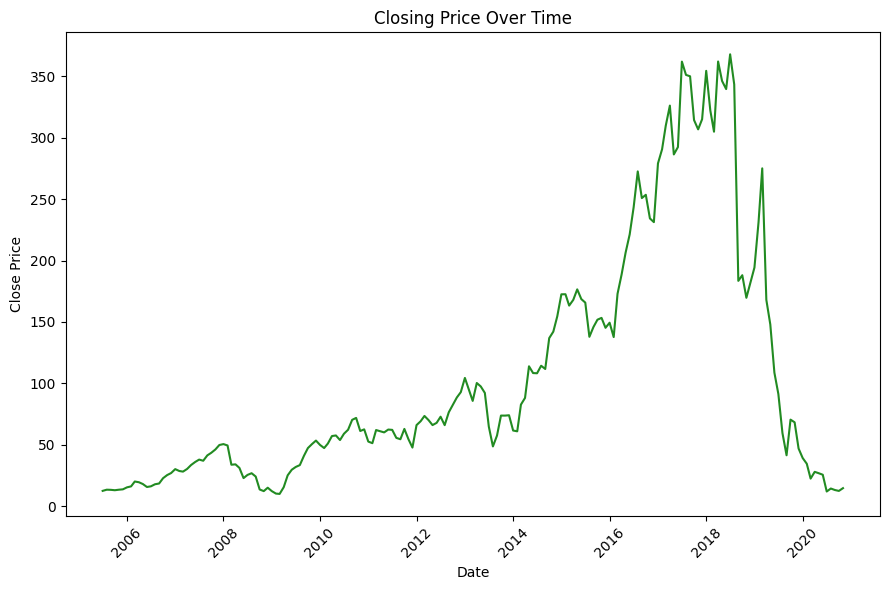

In [ ]:
plt.figure(figsize=(9, 6))
# Using a named color
plt.plot(data['Date'], data['Close'], color='forestgreen')

plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)  # Rotates the x-axis labels to make them more readable
plt.tight_layout()  # Adjusts subplot params to give some padding
plt.show()

### What all manipulations have you done and insights you found?


**Data Cleaning and Preparation**:
- Date Conversion: Converted the 'Date' column to datetime format (pd.to_datetime(data["Date"], format='%b-%y')) for proper date-based analysis and visualization.

**Visualization:**
- Line Graph: Created a line graph titled "Close Prices Over Time" using matplotlib to depict the trend of Close Price over time. The graph plots 'Close Price' on the y-axis against 'Date' on the x-axis, with a green line representing price fluctuations, aiding in identifying patterns and trends visually.

**Feature Extraction:**
- Numerical Feature Identification: Identified numerical features using numeric_fea = data.describe().columns, capturing quantitative features suitable for numerical analysis and modeling.

**Insights from the Visualization:**
- Overall Trend:
From the chart, it is observed that the stock was in an uptrend from 2009 to 2018. After that, there was a sharp fall in 2019 and 2020. The stock price in 2020 reached the lows of 2008.

- Periods of Volatility: Highlighted specific periods with sharp price fluctuations, such as those around 2018 and 2020.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

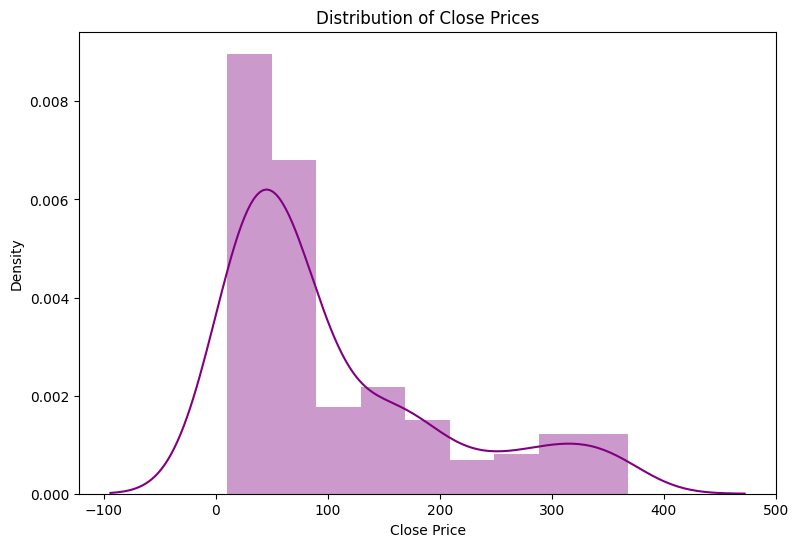

In [ ]:
# Chart - 1 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
sns.distplot(data['Close'], color='purple')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.show()


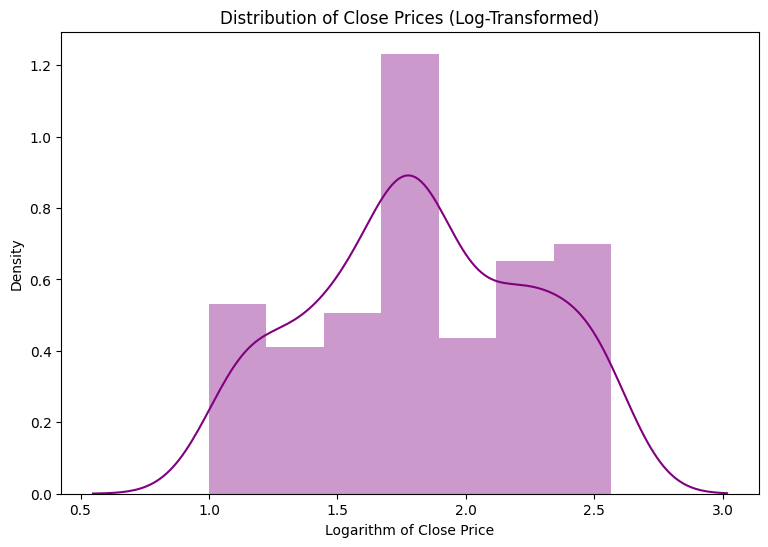

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
sns.distplot(np.log10(data["Close"]), color='purple')#for log transformation
plt.title('Distribution of Close Prices (Log-Transformed)')
plt.xlabel('Logarithm of Close Price')
plt.ylabel('Density')
plt.show()

##### 1. Why did you pick the specific chart?

The code provided utilizes a distribution plot to visualize the spread of the 'Close' prices. This type of plot is essential for understanding how the data points are distributed across different price ranges, aiding in identifying outliers and assessing the data's normality, which is particularly relevant in financial analysis.

Moreover, by log-transforming the data before plotting, the skewed distribution commonly observed in financial data, such as stock prices, can be better visualized. Log transformation helps normalize the distribution, making it easier to interpret the shape and spread of the data, which is crucial for accurate analysis and decision-making in financial contexts.

##### 2. What is/are the insight(s) found from the chart?

the graphs  provided offer some interesting insights into the historical closing prices of this stock. The distribution graph suggests a clustering of closing prices around ₹200, with less frequent occurrences at very high or very low prices. The log-transformed graph, focusing on the relative density of prices, indicates a similar clustering around ₹100 on the untransformed scale. There seems to be more variation in prices at the extremes (both high and low),

#### Chart - 2

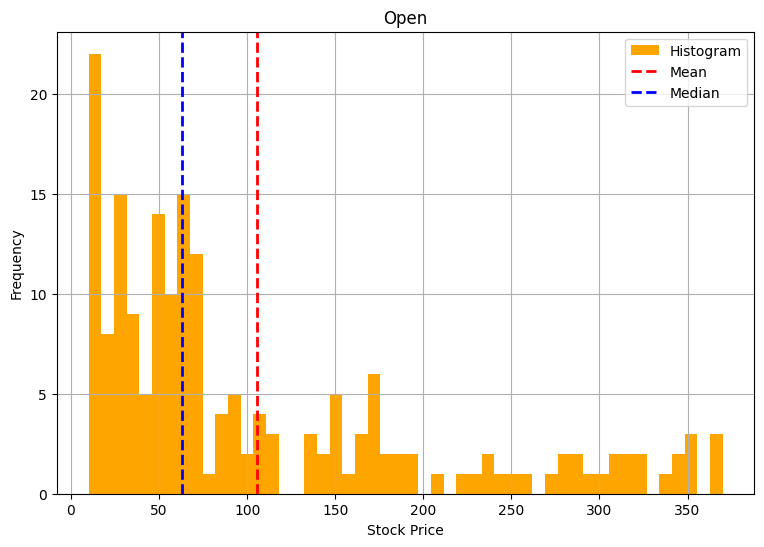

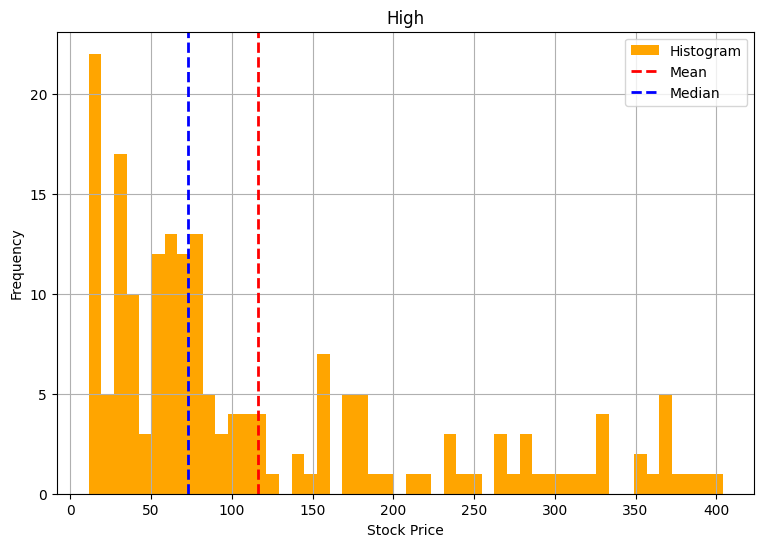

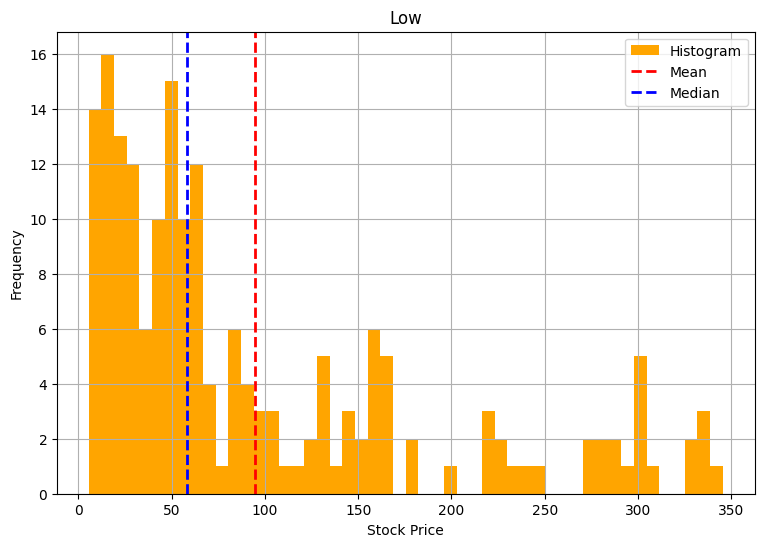

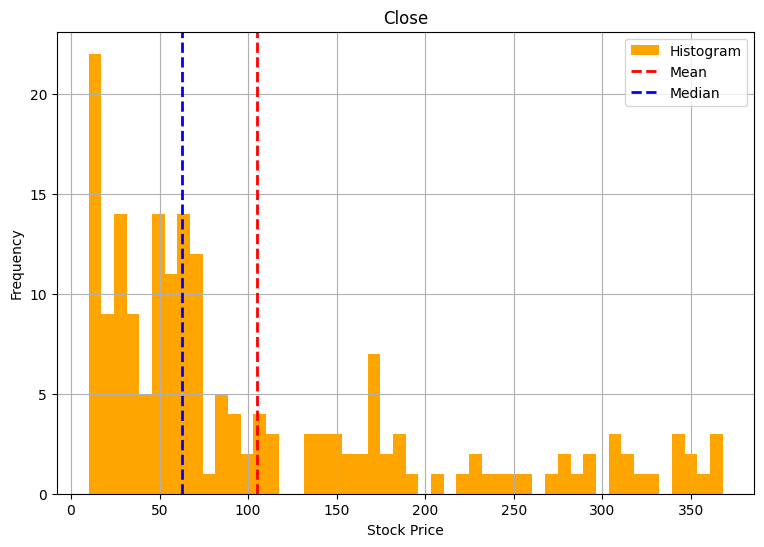

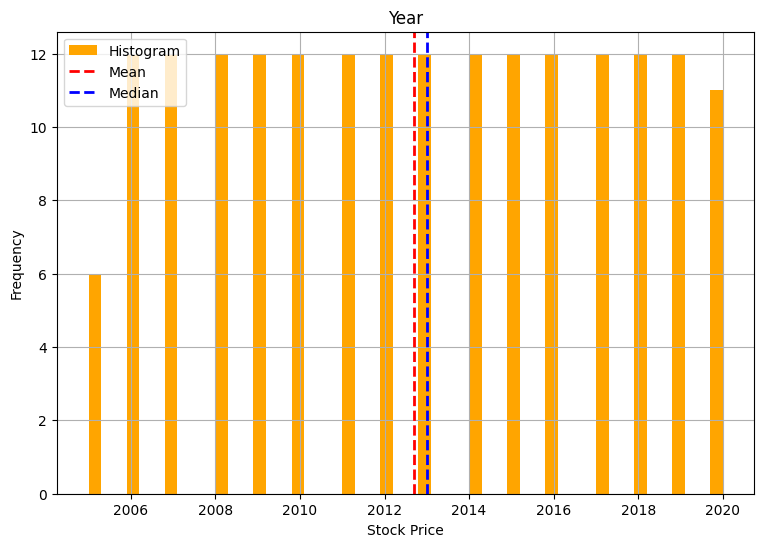

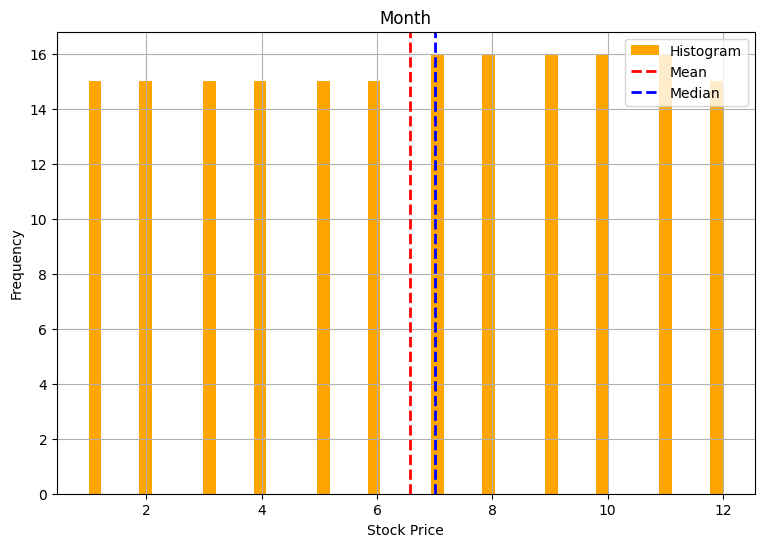

In [ ]:
# Plotting Histogram for each independent column in Data.
for col in numeric_fea[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax=ax, color='orange', label='Histogram')  # Changing histogram color to orange and adding label
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')  # Changing mean line color to red and adding label
    ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2, label='Median')  # Changing median line color to blue and adding label
    plt.xlabel('Stock Price')
    plt.ylabel('Frequency')
    ax.set_title(col)
    ax.legend()  # Adding legend
plt.show()




##### 1. Why did you pick the specific chart?

Histograms are used to visualize the distribution of a single variable. Here histograms used to visualize the distribution of independent variables.
We also plotted mean and median lines for better understanding of skewness of data.

##### 2. What is/are the insight(s) found from the chart?



Here are some insights from the chart:

**Distribution of Closing Prices**

* The most frequent closing prices are in the range of ₹20 to ₹60, as indicated by the tallest bar in the histogram.
* There are fewer closing prices at the extremes (above ₹300).

**Center and Variability**

* The red line represents the mean (average) closing price, and the blue line represents the median closing price.  
    * The mean appears to be slightly higher than the median, which indicates a **positive skew** in the distribution. This means there are more data points concentrated towards the higher closing prices (right side of the histogram).
    * The wider the bins or the larger the spread of bars, the higher the variability of closing prices. Conversely, narrower bins or a tighter grouping of bars indicate lower variability. In this case, the bins appear to be relatively wide, suggesting some variability in the closing prices.

**Additional Insights**

* The peak of the histogram is slightly to the left of the red line (mean). This suggests that there are more closing prices clustered below the average closing price.




#### Chart - 3

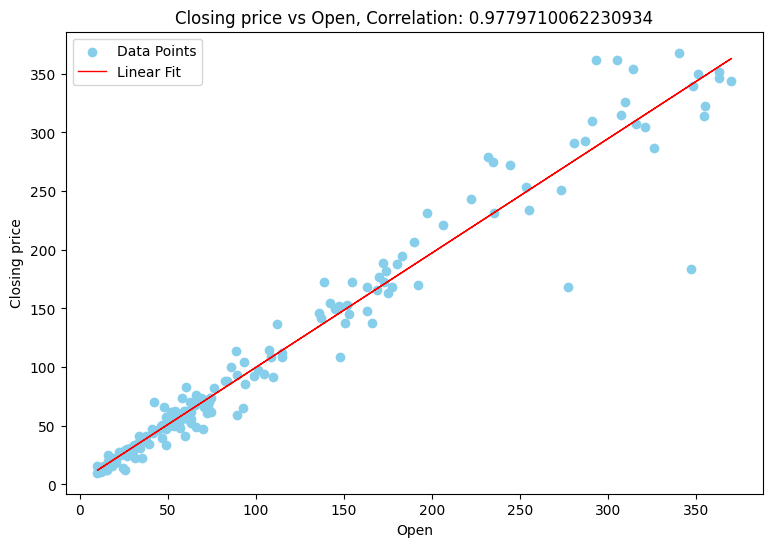

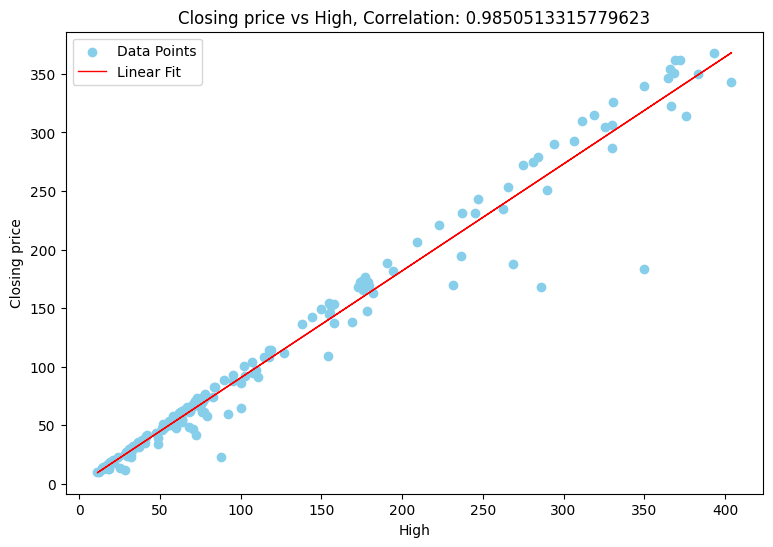

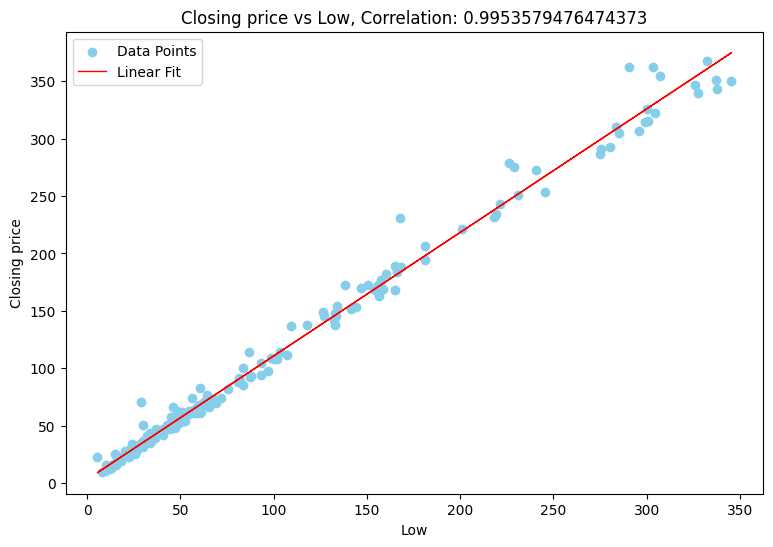

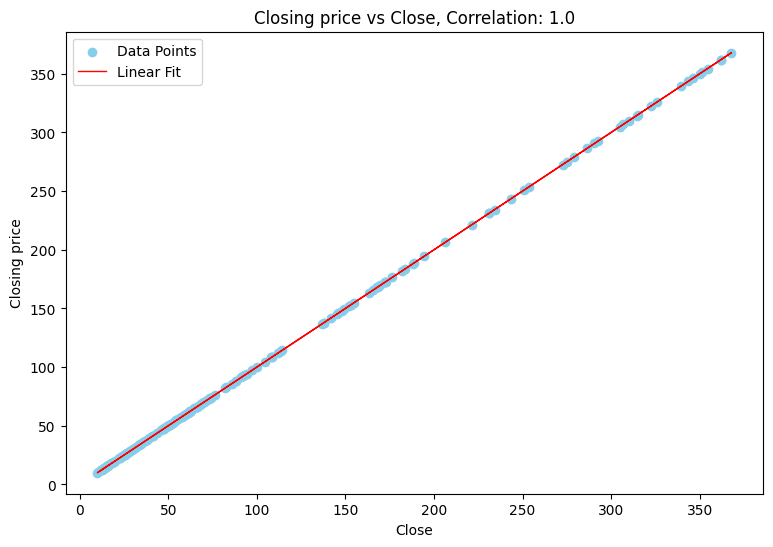

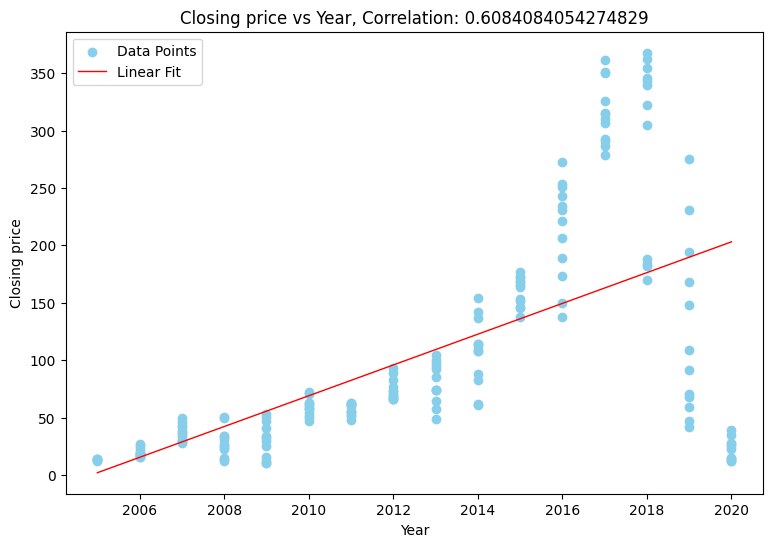

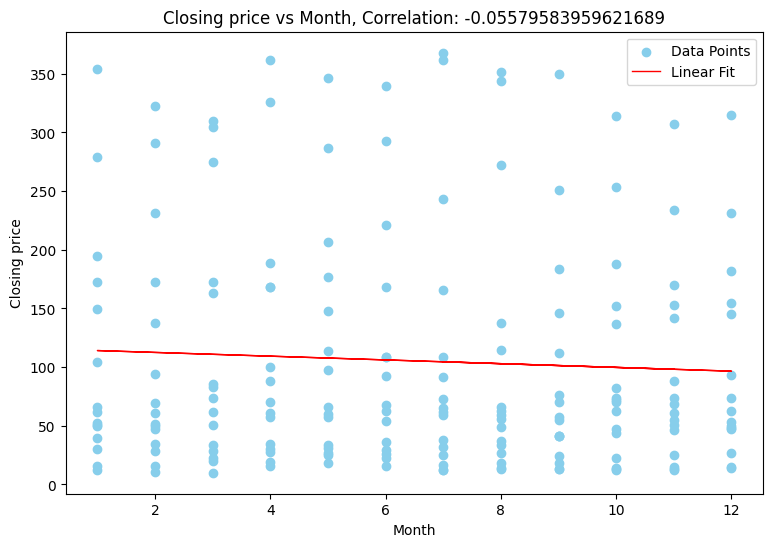

In [ ]:
# Chart - 3 visualization code

# Plotting graph Independent variable vs Dependent variable to check Multicollinearity
for col in numeric_fea[:-1]:
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(9, 6))

    # Extract the feature and label
    feature = data[col]
    label = data["Close"]

    # Calculate correlation between feature and label
    correlation = feature.corr(label)

    # Scatter plot
    ax.scatter(x=feature, y=label, color='skyblue', label='Data Points')  # Scatter plot in skyblue color

    # Set labels and title
    ax.set_ylabel("Closing price")
    ax.set_xlabel(col)
    ax.set_title('Closing price vs '+col+', Correlation: '+str(correlation))

    # Fit a linear regression line
    z = np.polyfit(data[col], data['Close'], 1)
    y_hat = np.poly1d(z)(data[col])
    ax.plot(data[col], y_hat, "red", lw=1, label='Linear Fit')  # Linear regression line in red color

    # Add legend
    ax.legend()

plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is a valuable visualization tool to explore the relationship between a dependent variable (e.g., the closing price of Yes Bank stock) and one or more independent variables. Each data point represents an observation, with the independent variable plotted on the x-axis and the dependent variable on the y-axis.

By examining the scatter plot, we can identify patterns or relationships between the variables. A close clustering of points around a straight line suggests a strong linear relationship, while scattered points indicate a weaker or no relationship.

This analysis helps determine the strength and linearity of the relationship between the closing price and independent variable(s). It informs the choice of machine learning algorithms for predicting the closing price and highlights any data irregularities requiring attention before model training.

##### 2. What is/are the insight(s) found from the chart?

Below is the combined analysis for the scatter plots showing the correlation between the closing price and different price metrics (opening price, high price, and low price) of a stock:

---

**Correlation Analysis:**

* **Opening Price vs. Closing Price:**
  - The scatter plot exhibits a positive linear relationship, indicating that higher opening prices are associated with higher closing prices and vice versa.
  - The correlation coefficient of **0.9779** indicates a very strong positive correlation, suggesting a close relationship between the opening price and the closing price.

* **High Price vs. Closing Price:**
  - A positive linear relationship is observed, implying that days with higher high prices tend to have higher closing prices.
  - The correlation coefficient of **0.9850**, very close to 1, signifies a very strong positive correlation between the high price and the closing price.

* **Low Price vs. Closing Price:**
  - Surprisingly, there is a positive linear relationship between lower low prices and higher closing prices. This counter-intuitive relationship suggests that lower low prices are associated with higher closing prices.
  - The correlation coefficient of **0.9953**, extremely close to 1, reflects a very strong positive correlation between the low price and the closing price.

**Trendline Analysis:**

* **Opening Price vs. Closing Price:**
  - The upward-sloping trendline reinforces the positive correlation between the opening price and the closing price.
  - Although there is some variability around the trendline, it indicates a general tendency for the closing price to be higher on days with a higher opening price.

* **High Price vs. Closing Price:**
  - Similar to the opening price, the upward-sloping trendline confirms the positive correlation between the high price and the closing price.
  - While the data points exhibit slight deviations from the trendline, the overall pattern suggests that days with higher high prices tend to result in higher closing prices.

* **Low Price vs. Closing Price:**
  - Despite the positive correlation, the downward-sloping trendline may appear contradictory. However, this trendline reflects that lower low prices are associated with higher closing prices, aligning with the observed positive correlation.
  - The trendline indicates that days with lower low prices tend to have higher closing prices, despite some variability in the data points.



#### Chart - 4

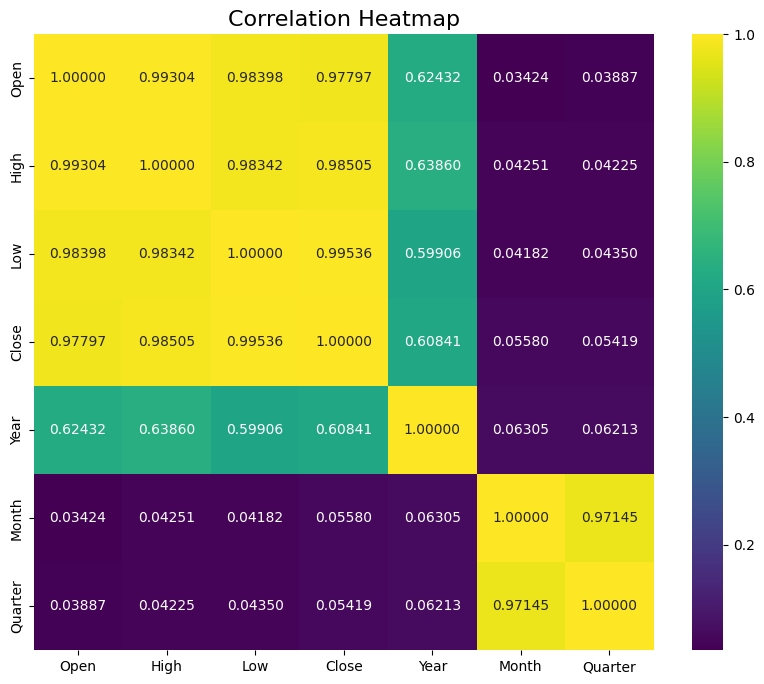

In [ ]:
# Chart - 4 visualization code

# Increase the figure size for better visualization
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix
cor = data.corr()

# Plot the heatmap with absolute correlation values
sns.heatmap(abs(cor), annot=True, cmap='viridis', fmt=".5f")

# Add title and adjust font size
plt.title('Correlation Heatmap', fontsize=16)

# Adjust the font size of the annotations for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Heatmap can be used to explore the correlation between the closing price and the independent variables. By examining the heatmap, we can identify any patterns or relationships between the variables, which can inform the selection of appropriate ML algorithms for predicting the closing price.

A heatmap can also be used to identify any potential issues with the data, such as multicollinearity (i.e., high correlation between independent variables).

##### 2. What is/are the insight(s) found from the chart?


Here are some insights based on the heatmap:

1. The diagonal from the top left to the bottom right shows perfect correlations of 1.00000. This is expected as it represents the correlation of each variable with itself.

2. The correlations between "Open," "High," "Low," and "Close" are all very high, indicated by the bright colors (yellow and green shades). The values are all above 0.97797, which suggests that these variables move in a highly synchronized manner. This is typical for financial data since these price points within the same trading day or period are often closely related.

3. The "Open" and "Close" variables have the lowest correlation among the pairs (0.97797), which makes sense because opening and closing prices are the furthest apart in time within a trading day, and thus can be influenced by more varied factors.

4. The "High" and "Low" variables, while still very highly correlated to the "Open" and "Close" prices, show a slightly lesser degree of correlation compared to the "Open" to "High," "High" to "Close," "Open" to "Low," and "Low" to "Close" correlations. This is logical, as the high and low represent extremes that may not occur at the open or close of trading.



#### Chart - 5

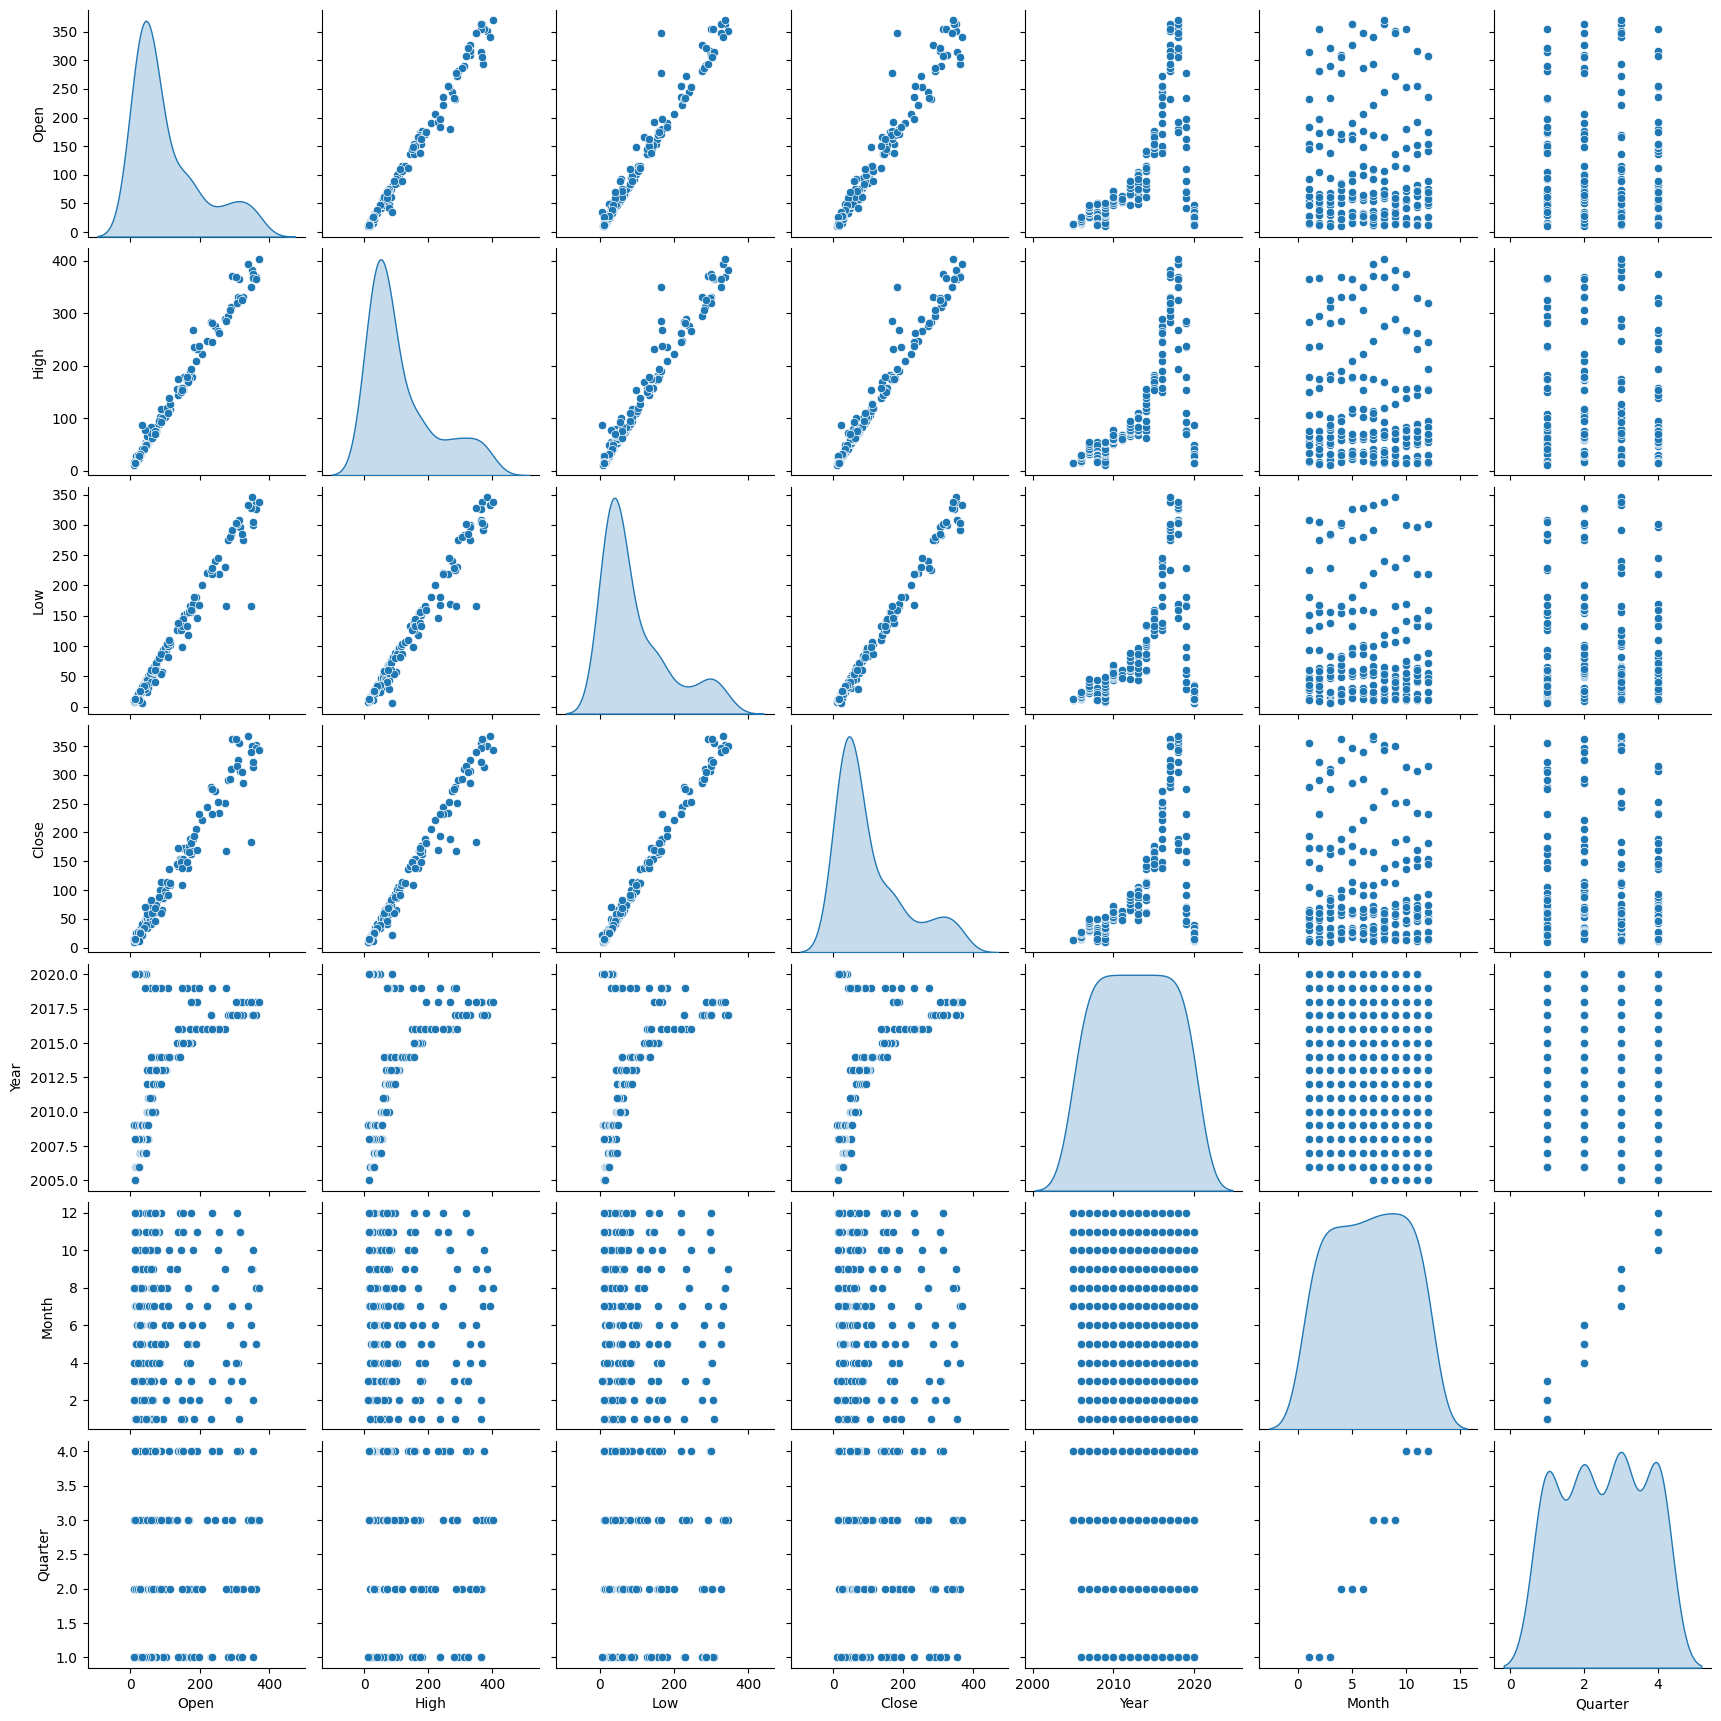

In [ ]:
# Chart - 5 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the data for pairplot

# Set x label as 'pprize' and change color using the "rocket" palette
sns.pairplot(data, diag_kind='kde', palette='rocket')

# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

Pair plot is good as visualising scatter plot and distribution together.
pair plot also good at showing realtion variables with scatter plot.
I used pair plot to analyse the patterns of data and realationship between the features.
It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?



Here are some insights

1. Linear Relationships: The scatter plots show a strong, positive, linear relationship between all pairs of "Open," "High," "Low," and "Close" data points. This implies that when one of these variables increases, the others tend to increase as well, which is typical in stock market data as these prices move in sync throughout a trading day.

2. Data Distribution: The histograms on the diagonal show that the distributions of "Open," "High," "Low," and "Close" prices are skewed to the right, indicating that there are more days with lower stock prices and fewer days with very high stock prices.

3. Homogeneity of Variance: The scatter plots reveal homogeneity of variance (homoscedasticity) as the data points are evenly spread along the range of values, without showing any pattern like a funnel which would indicate heteroscedasticity.

Based on this visualization, further statistical analysis could be conducted to determine correlations, perform regression analysis, or predict future prices using these variables. It's also essential for an analyst to consider other factors such as volume, market news, and economic indicators that are not represented in this plot but can significantly affect stock prices.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

**How it works?**

For Yes bank closing price prediction, let's assume:

Assumptions:

**Test-statistic**: An average closing price for Yes bank is X, i.e., μ (Population) = X.

**Null Hypothesis (H0)**: The average closing price for Yes bank is X.
Alternative Hypothesis (Ha) : The average closing price for Yes bank is different than X.

**Significance Level**: α = 0.05 (generally a low value)

**Sample statistic**: We take a sample of n days of Yes bank closing prices and find that the average closing price is Y.

We perform n experiments, and if probability of getting the sample statistic, given the average closing price is X, for n observations (p-value) is less than 0.05 we Reject the Null Hypothesis and Accept the Alternative Hypothesis, otherwise we do not Reject the Null Hypothesis.
p-value = P( μ (sample) ≠ X | H0 is True ).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** :

"The predicted closing prices of Yes Bank stock using the linear regression model are not significantly different from the actual closing prices."

**Alternative Hypothesis** :

"The predicted closing prices of Yes Bank stock using the linear regression model are significantly different from the actual closing prices."

**Defining null hypothesis and alternate hypothesis.**

**H0:** μpredicted - μactual = 0

Where:

**μpredicted** = mean of predicted closing prices\
**μactual** = mean of actual closing prices

The equation form of the alternative hypothesis "The predicted closing prices of Yes Bank stock using the linear regression model are significantly different from the actual closing prices" would be:

**H1:** μpredicted - μactual ≠ 0

Where:

μpredicted = mean of predicted closing prices\
μactual = mean of actual closing prices

This is assuming that you are using a t-test, where the null hypothesis is that the means of the two groups (predicted and actual closing prices) are equal and the alternative hypothesis is that they are not equal.

*Significance Value* = 0.05 or 5%

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
import statistics

In [ ]:

# Calculate the mean of the 'Close' column
Close_mean = np.mean(data['Close'])
Close_mean

105.2047027027027

In [ ]:
#calculating p_value

Close_sample = data['Close'].sample(n=10,random_state=42)

In [ ]:
# t_test
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(Close_sample,Close_mean)

In [ ]:
print(round(p_value,3))

0.717


In [ ]:
if p_value > 0.05:
  print("we are accepting null hypothesis \nThe predicted closing prices of Yes Bank stock using the linear regression model are not significantly different from the actual closing prices")
else:
  print("we are rejecting null hypothesis\nThe predicted closing prices of Yes Bank stock using the linear regression model are significantly different from the actual closing prices.")

we are accepting null hypothesis 
The predicted closing prices of Yes Bank stock using the linear regression model are not significantly different from the actual closing prices


##### Which statistical test have you done to obtain P-Value?

  Performed Statistical T-Test to obtain P-Value

##### Why did you choose the specific statistical test?

In the context of Yes Bank Closing stock price prediction, a t-test can be used to evaluate the performance of a linear regression model, which is a common method used to predict stock prices. The regression model is used to fit a line to the historical data of the stock prices, and the t-test is used to determine whether the slope of the line (coefficient) is significantly different from zero.

The t-test is used to evaluate the significance of the predictor variable in the regression model, and a small p-value (typically < 0.05) indicates that the predictor variable is significantly related to the stock price, and hence it is useful in the model.

#Conclusion


As the p-value is greater than the significance level i.e 0.626 > 0.05, we accept the null hypothesis and conclude that The predicted closing prices of Yes Bank stock using the linear regression model are not significantly different from the actual closing prices.

### Hypothetical Statement - 2

Average Closing stock price is equals to average Opening stock Price.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0      : μ1 = μ2

Alternate hypothesis H1 : μ1 ≠ μ2

Test type : Two Tailed test

singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import norm
import numpy as np

# Calculate means and sizes
open_mean = np.mean(data['Open'])
close_mean = np.mean(data['Close'])
open_size = data['Open'].size
close_size = data['Close'].size

# Calculate pooled standard deviation
pooled_std = np.sqrt(((open_size - 1) * np.var(data['Open']) + (close_size - 1) * np.var(data['Close'])) / (open_size + close_size - 2))

# Calculate z-value
z_value = (open_mean - close_mean) / (pooled_std * np.sqrt(1/open_size + 1/close_size))

# Calculate p-value for two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_value)))

# Set significance level
significance_level = 0.05

# Conclusion
if p_value > significance_level:
    print(f"Failed to reject the Null Hypothesis as p-value = {p_value}.")
else:
    print(f"Null Hypothesis rejected Successfully as p-value = {p_value}.")


Failed to reject the Null Hypothesis as p-value = 0.9737638583014707.


##### Which statistical test have you done to obtain P-Value?

I have used two sample Z-Test as the statistical test to obtain P-Value and found the result that At the 5% significance level, There is not enough evidence to reject the Null hypothesis. so, we can conclude that average Closing stock price is equal to average Opening stock Price.

##### Why did you choose the specific statistical test?

Because sample sizes are large enough, more than 30.

### Hypothetical Statement - 3

Average closing stock price in 2018 is more than 300.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0 : μ = 300

Alternate hypothesis H1 : μ > 300

Test type : Right Tailed test

singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import t
import numpy as np

mean = 300
sample_mean = np.mean(data['Close'][data['Year'] == 2018])  # mean
sample_size = data['Close'][data['Year'] == 2018].size      # sample size
std = np.std(data['Close'][data['Year'] == 2018])           # standard deviation

# t-test
t_statistic = (sample_mean - mean) / (std/np.sqrt(sample_size))

# calculate p-value
p_value = t.cdf(t_statistic, sample_size-1)  # Right-tailed test

# conclusion
significance_level = 0.05
if p_value > significance_level:
    print(f"Failed to reject the Null Hypothesis as p-value = {p_value}.")
else:
    print(f"Null Hypothesis rejected Successfully as p-value = {p_value}")


Failed to reject the Null Hypothesis as p-value = 0.3119638735561073.


In [ ]:
sample_size = data['Close'][data['Year'] == 2018].size
sample_size

12

##### Which statistical test have you done to obtain P-Value?

I have used t-test as the statistical test to obtain P-Value and found the result that At the less than 5% significance level, we have insufficient evidence to reject the Null hypothesis. so, we can conclude that average closing stock price in 2018 is equal to 300.

##### Why did you choose the specific statistical test?

* Because sample size is small, less than 30.
* And population variance is unknown.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:

# Handling Missing Values & Missing Value Imputation
'''
# No missing values
'''

'\n# No missing\xa0values\n'

There is no missing values in the dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
'''
# No outliers
'''

'\n# No outliers\n'

##### What all outlier treatment techniques have you used and why did you use those techniques?


There are no outliers present in the dataset.

### 3. Categorical Encoding

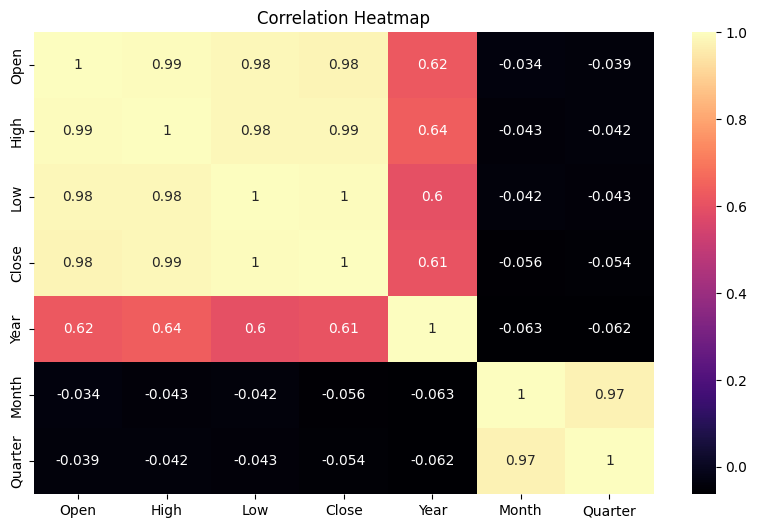

In [ ]:
# Encode your categorical columns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(data.corr(), annot=True, cmap='magma')  # Plot correlation heatmap with annotations and coolwarm colormap
plt.title('Correlation Heatmap')  # Add title to the plot
plt.show()# Show the plot

In [ ]:

data = pd.get_dummies(data, columns=['Month'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

1. **One-Hot Encoding**: Converts categorical variables into binary columns, where each category becomes a binary feature. This method is widely used as it preserves the categorical nature of the data and prevents ordinal assumptions.

Other techniques include:

- *Label Encoding*: Assigns a unique integer to each category. It can introduce unintended ordinal relationships.
  
- *Ordinal Encoding*: Assigns integers based on the ordinal relationship of categories. It assumes a specific order, which may not always be accurate.

The choice of encoding depends on factors like the nature of the data and the requirements of the machine learning algorithm. One-hot encoding is often preferred for nominal categorical variables and algorithms that require numerical input without ordinal assumptions.

# **4 Feature Manipulation**

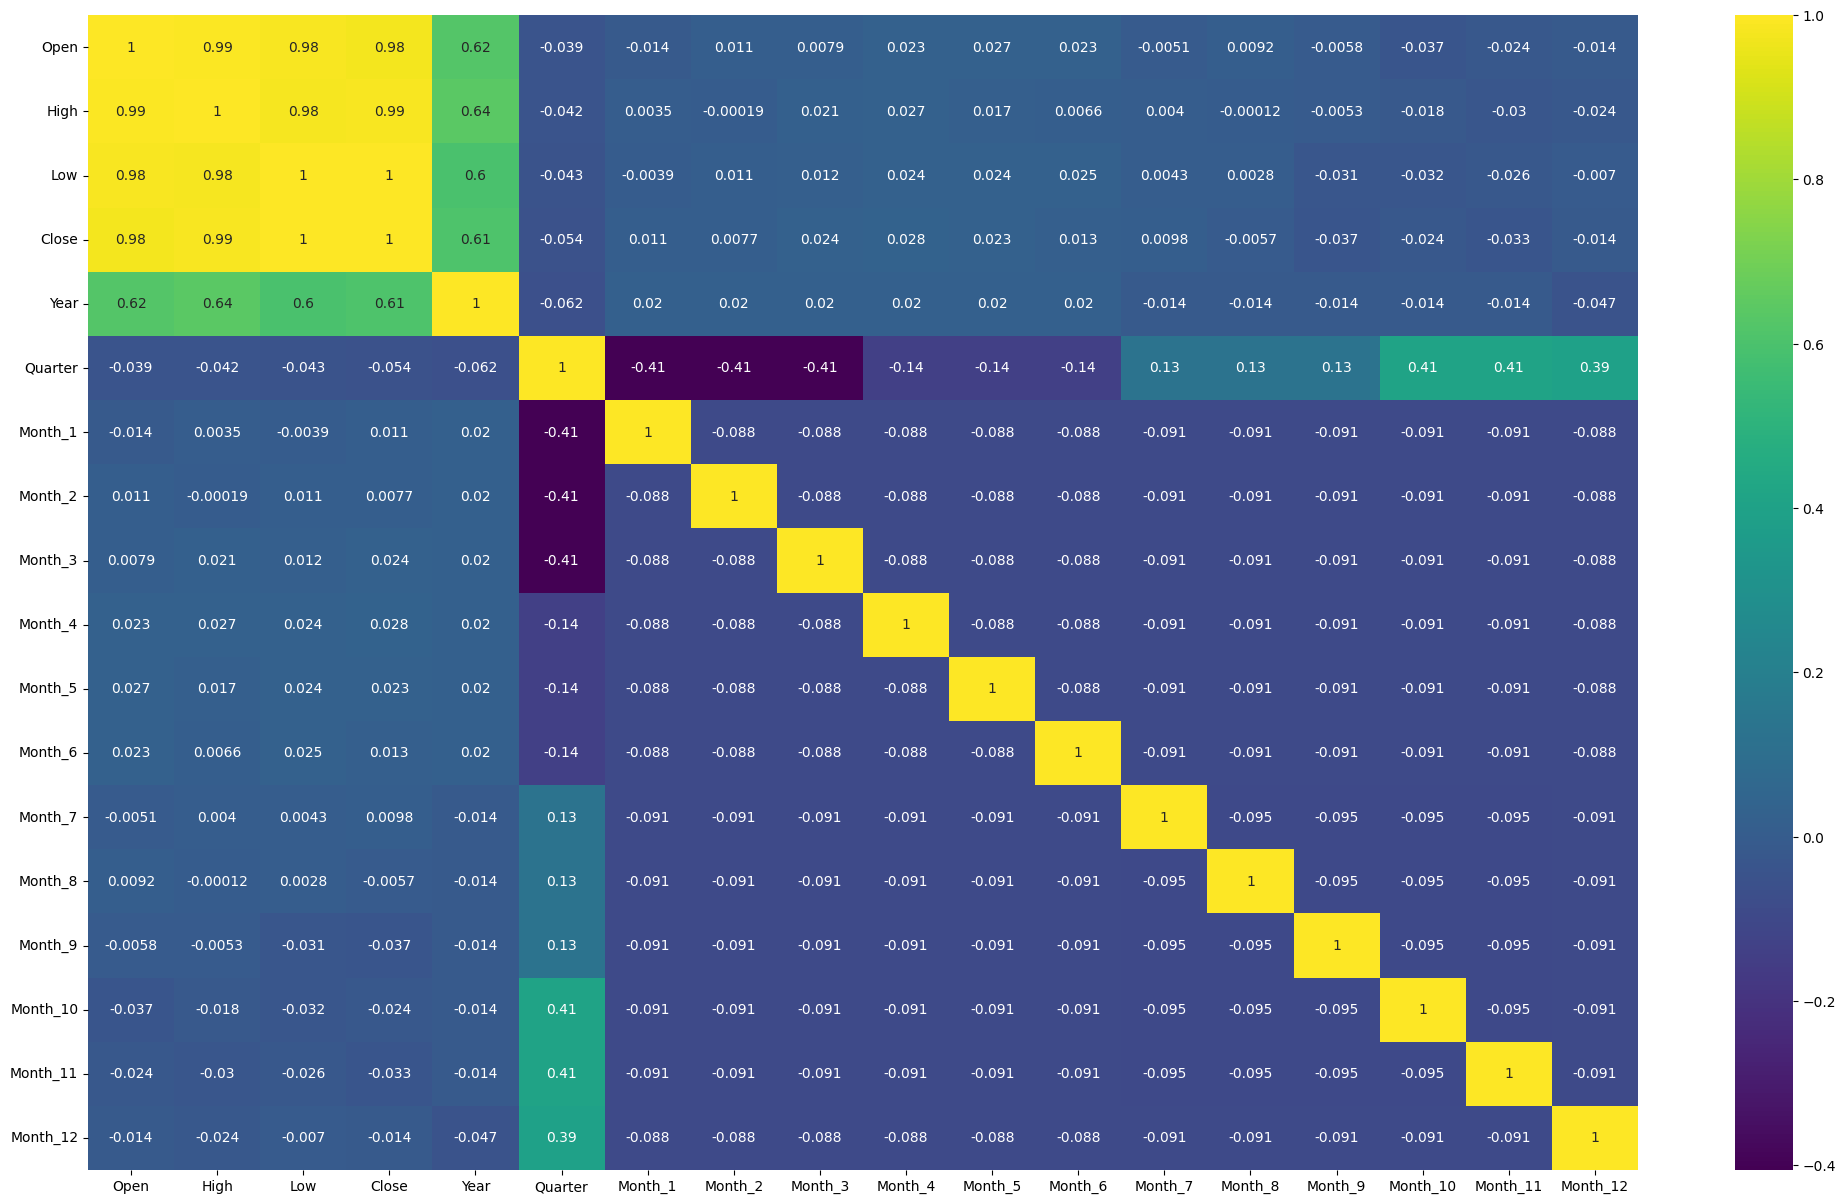

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,15))  # Set the figure size
sns.heatmap(data.corr(), annot=True, cmap='viridis')  # Plot correlation heatmap with annotations and viridis colormap
plt.show()# Show the plot

Insights:
 In this heatmap:

- The colours represent the strength and direction of the correlation between two variables. The scale on the right side indicates that yellow represents a correlation coefficient close to 1 (strong positive correlation), purple represents a correlation coefficient close to -1 (strong negative correlation), and green represents a correlation coefficient close to 0 (no correlation).
- The variables are labelled on both the vertical and horizontal axes, and they include 'Open', 'High', 'Low', 'Close', 'Year', 'Quarter', and 'Month_1' through 'Month_12'.
- It seems the data might be related to financial markets, as the terms 'Open', 'High', 'Low', and 'Close' typically refer to stock prices at the opening, highest point, lowest point, and closing of the trading day, respectively.
- The strongest correlations (shown in yellow) are among 'Open', 'High', 'Low', and 'Close', which is expected since these are all related to daily stock price movements and often move in tandem.
- 'Year' and 'Quarter' show very little to no correlation with the daily stock price variables, which is indicated by the green squares.
- The monthly variables ('Month_1' to 'Month_12') show some varying degrees of correlation with each other and with the 'Year' and 'Quarter' variables. The purple squares indicate negative correlations, though they are generally quite weak.
- The diagonal from the top left to the bottom right is all yellow because each variable is perfectly correlated with itself, which is why the correlation coefficient is 1.

This heatmap can be used to gain insights into what extent time-related variables (such as months, quarters, and years) have relationships with stock market variables. It can also help in building predictive models and understanding the dynamics of the market over different time periods.

1. Feature Manipulation
create new feature by taking average of (open, low, high) as they are highly correlated with each other

In [ ]:
# Create new feature 'OHL' by taking the average of 'Open', 'High', and 'Low' columns
data['OHL'] = data[['Open', 'High', 'Low']].mean(axis=1).round(2)

# Display the first few rows of the DataFrame to verify the changes
data.head()

,Date,Open,High,Low,Close,Year,Quarter,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,OHL
0,2005-07-01,13.00,14.00,11.25,12.46,2005,3,0,0,0,0,0,0,1,0,0,0,0,0,12.75
1,2005-08-01,12.58,14.88,12.55,13.42,2005,3,0,0,0,0,0,0,0,1,0,0,0,0,13.34
2,2005-09-01,13.48,14.87,12.27,13.30,2005,3,0,0,0,0,0,0,0,0,1,0,0,0,13.54
3,2005-10-01,13.20,14.47,12.40,12.99,2005,4,0,0,0,0,0,0,0,0,0,1,0,0,13.36
4,2005-11-01,13.35,13.88,12.88,13.41,2005,4,0,0,0,0,0,0,0,0,0,0,1,0,13.37


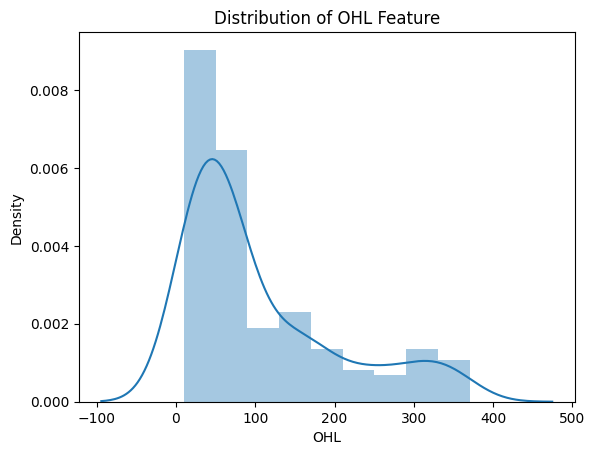

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'OHL' feature
sns.distplot(data['OHL'])

# Add labels and title
plt.xlabel('OHL')
plt.ylabel('Density')
plt.title('Distribution of OHL Feature')

# Show the plot
plt.show()

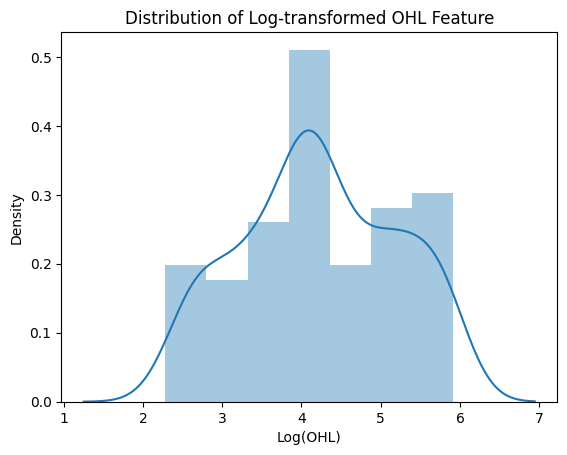

In [ ]:
# Apply log transform to the 'OHL' feature
data['log_OHL'] = np.log(data['OHL'])

# Plot the distribution of the log-transformed 'OHL' feature
sns.distplot(np.log(data['OHL']))

# Add labels and title
plt.xlabel('Log(OHL)')
plt.ylabel('Density')
plt.title('Distribution of Log-transformed OHL Feature')

# Show the plot
plt.show()

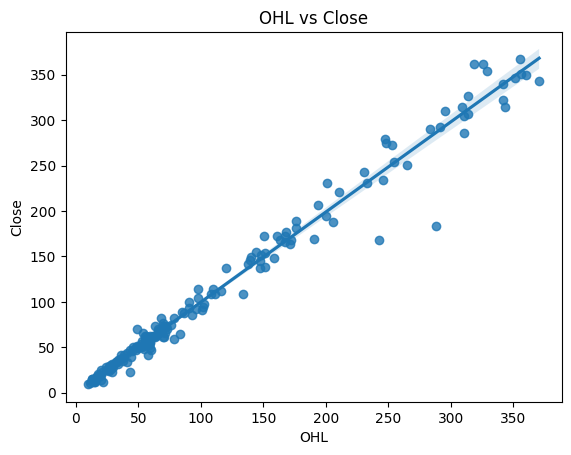

In [ ]:

# Create a regression plot ('regplot') between 'OHL' and 'Close'
sns.regplot(x=data['OHL'], y=data['Close'])

# Add title and labels
plt.title('OHL vs Close')
plt.xlabel('OHL')
plt.ylabel('Close')

# Show the plot
plt.show()


2. Feature Selection

In [ ]:
# Update selected features with correct case
selected_features = ['Year', 'OHL', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
                     'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Close']

# Select specific features from the DataFrame 'data'
selected_df = data[selected_features]

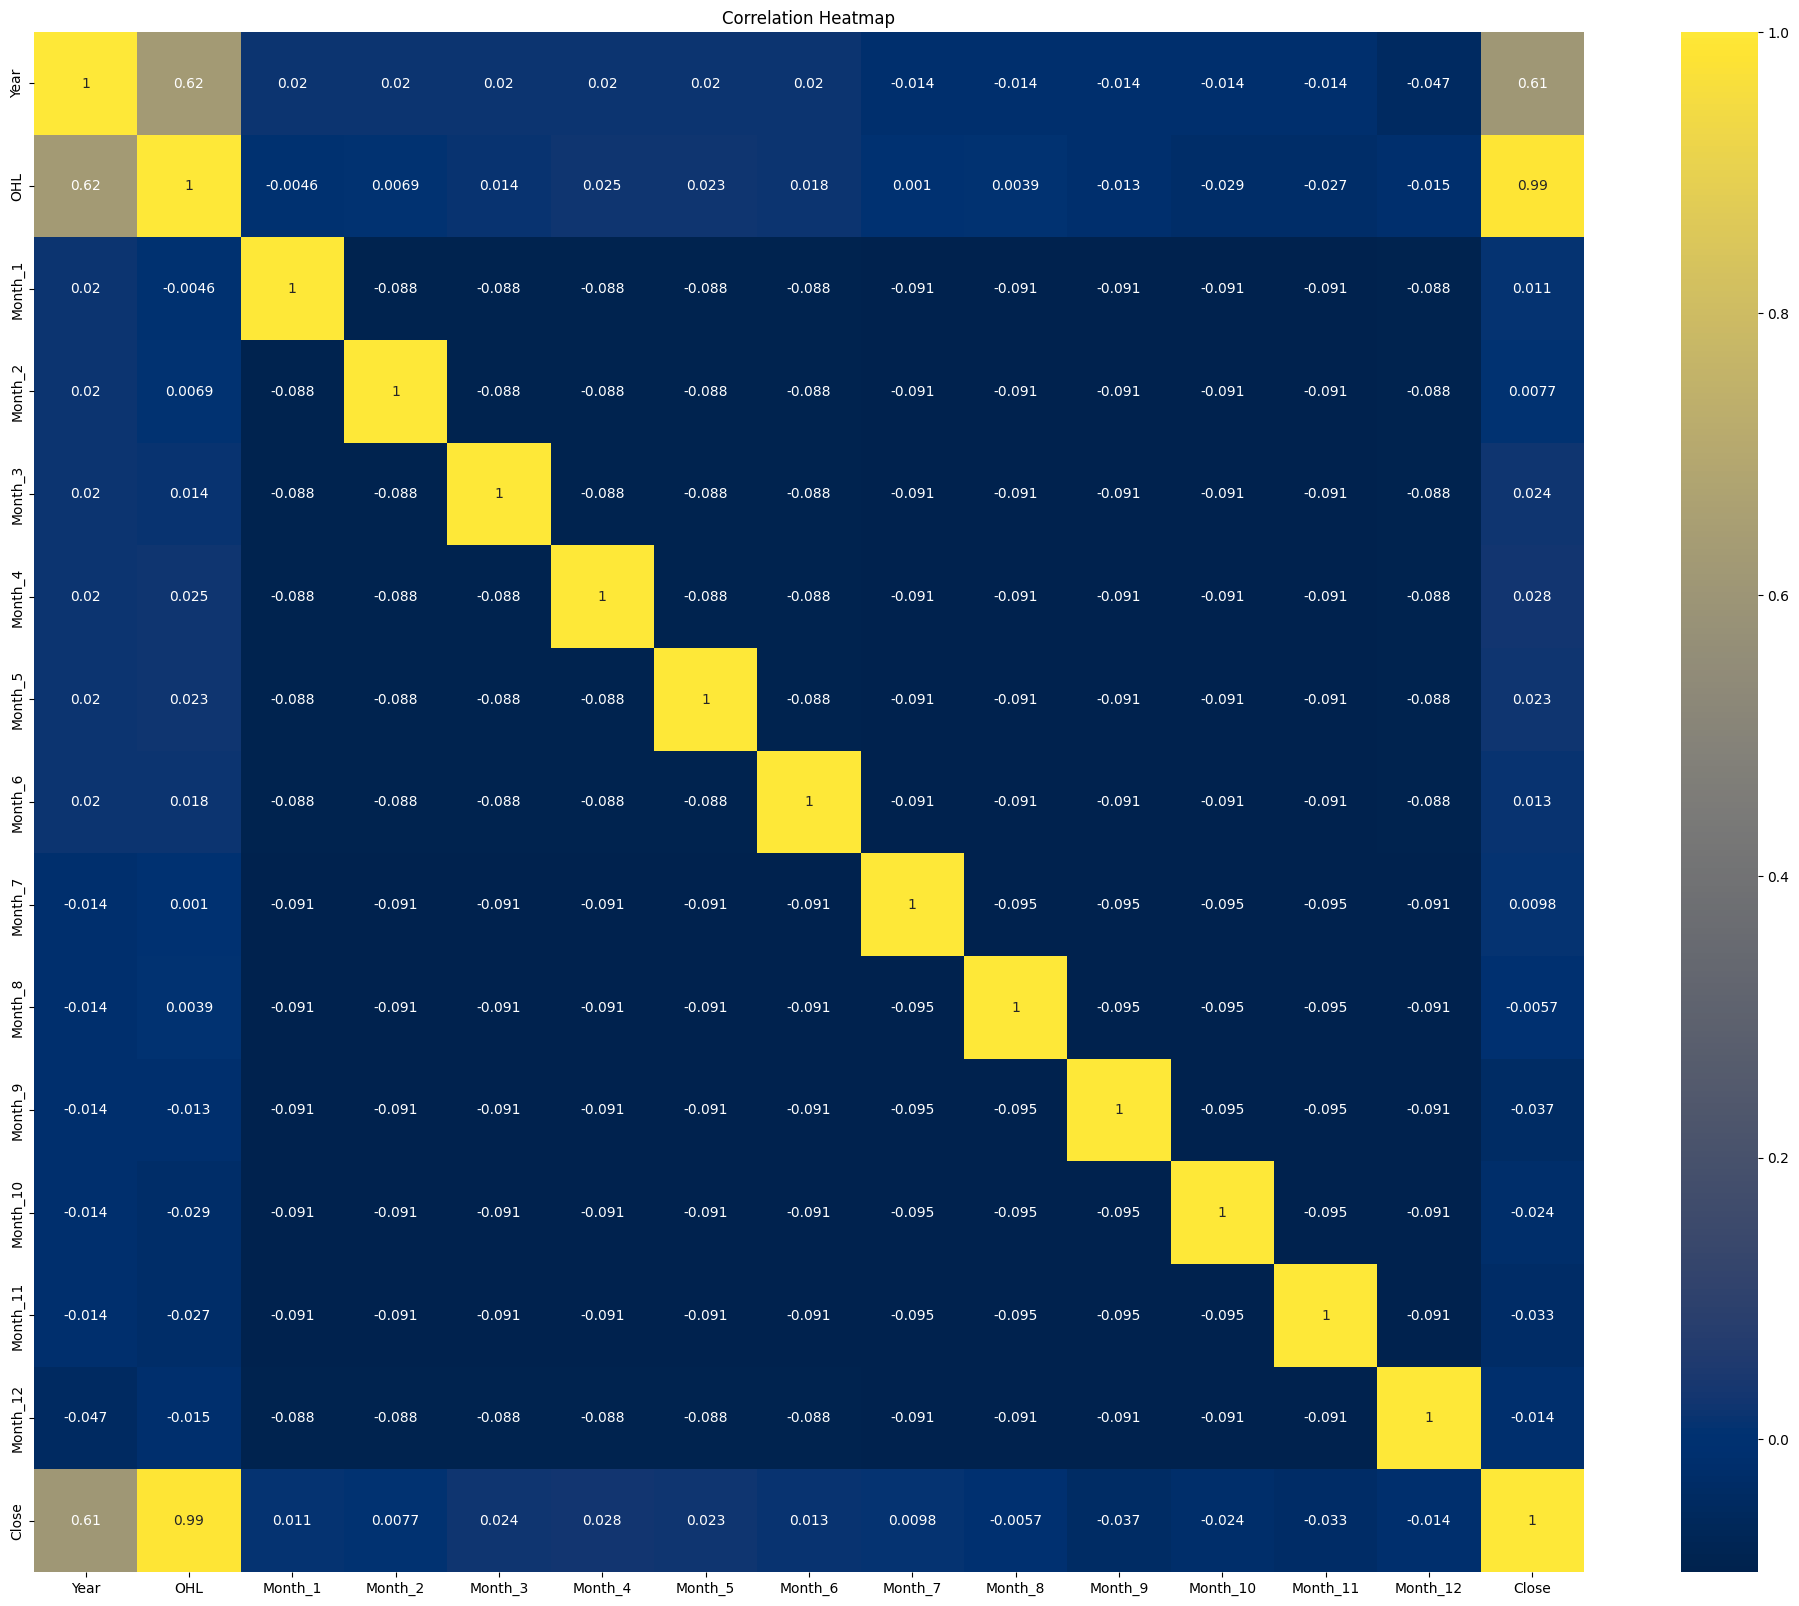

In [ ]:
plt.figure(figsize=(25, 20))  # Set the figure size
sns.heatmap(selected_df.corr(), annot=True, cmap='cividis')  # Plot correlation heatmap with annotations and cividis colormap
plt.title('Correlation Heatmap')  # Add title to the plot
plt.show()

##### What all feature selection methods have you used  and why?

1. Feature engineering  

* Created a new feature 'OHL' feature from 'Open', 'High' and 'Low' feature as they were had strong correlation with eachother as well as dependent variable 'Close'.
* created dummy variables for 'Month' feature.



2. multicollinearity
* droped 'Open', 'High' and 'Low' feature as they were had strong correlation with eachother.
* droped 'quarter' as it was highly correalated with 'month'.

3. Correaltion
* selected features based on their correlation with dependent variable.

##### Which all features you found important and why?

* 'OHL' which is average of 'Open', 'High' and 'Low'is most important as it is highly correlated with dependent variable.
* 'Year' and 'month' are also important features as it is a timeseries dataset and also has decent correlation with dependent variable.

## ***5. Data Transformation***

In [ ]:
# creating the set of dependent and independent variables
x = selected_df.drop(labels=['Close'], axis=1)
y = selected_df['Close']

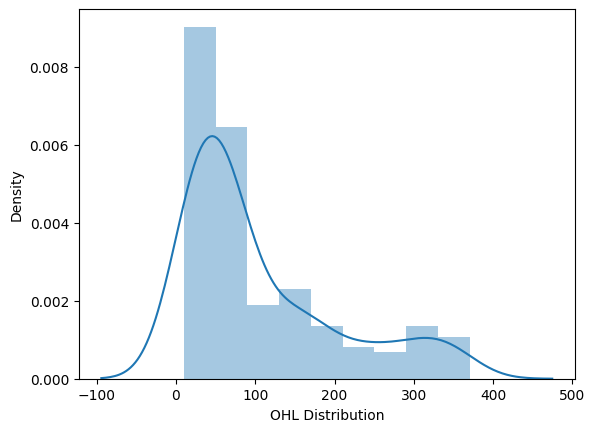

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#  x is your DataFrame containing the 'OHL' distribution data

sns.distplot(x['OHL'])
plt.xlabel('OHL Distribution')
plt.show()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data transformation is need on 'OHL', as you can see in above plot, it is a right skewed distribution. i'm going to use log transform.

In [ ]:
# Transform Your data

# log transform
x['OHL'] = np.log(x['OHL'])

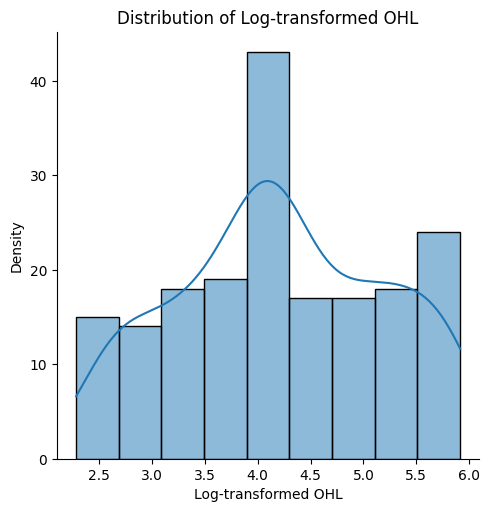

In [ ]:
# Now, creating a displot for the log-transformed 'OHL' column.
sns.displot(x['OHL'], kde=True)  # kde=True adds a Kernel Density Estimate plot

plt.xlabel('Log-transformed OHL')
plt.ylabel('Density')
plt.title('Distribution of Log-transformed OHL')
plt.show()

## ***6. Data Scaling***

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

##### Which method have you used to scale you data and why?

StandardScaler, Many machine learning algorithms assume that the input features are normally distributed, and have similar means and standard deviations. If the features are not normalized, they may have different scales and ranges, which can lead to bias in the algorithm's predictions. Standard scaling can help prevent this bias by ensuring that each feature has a similar range and distribution.

## ***7. Dimensionality Reduction***

##### Do you think that dimensionality reduction is needed? Explain Why?

* No, dimensionality reduction is not needed here because Dimensionality reduction is a process of reducing the number of features and we do not have too many features in this dataset.

In [ ]:
# DImensionality Reduction (If needed)
'''
# No, dimensionality reduction is not needed here because there are not too many features.
'''

'\n# No, dimensionality reduction is not needed here because there are not too many\xa0features.\n'

## ***7. Data Splitting***

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

##### What data splitting ratio have you used and why?

80/20, because
* A common splitting ratio for supervised learning tasks is the 80/20 or 70/30 split, where 80% or 70% of the data is used for training the model, and the remaining 20% or 30% is used for evaluating the model's performance on unseen data (i.e., testing data). This ensures that the model is not overfitting to the training data and can generalize well to new, unseen data.
* Also we don't have larger dataset here and we need to take a decent amount of data to full fill testing process. if we had a larger datasets, a 90/10 or 95/5 split may be used, where the model is trained on a larger portion of the data, while still keeping a small portion aside for evaluation

## ***7. ML Model Implementation***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn.metrics import mean_absolute_percentage_error  # Make sure to import your custom function if it's defined in a separate module


In [ ]:
# Function to plot actual vs prediction
def plot_actual_vs_pred(model, model_name=None, x_test=x_test, y_test=y_test):
    '''
    Visualizing Actual VS Prediction
    '''
    # Predict on the model
    y_pred = model.predict(x_test)
    plt.figure(figsize=(10,8))
    plt.plot(y_pred, label="Prediction", linewidth=1.5)
    plt.plot(y_test.values, label="Actual", linewidth=1.5)
    error = mean_absolute_error(y_test, y_pred)
    plt.title(f"{model_name} - Actual VS Prediction")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Function to plot coefficients
def plot_coef(model, model_name=None):
    features = selected_df.drop('Close', axis=1).columns
    coefficients = model.coef_
    # Generate colors based on the sign of the coefficients
    colors = ['#d62728' if coef < 0 else '#2ca02c' for coef in coefficients]

    plt.bar(features, coefficients, color=colors)
    plt.xticks(fontsize=12, rotation=90)
    plt.title(f'{model_name if model_name else "Model"} - Coefficients')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefficients), linestyles='dashed')
    plt.show()

# Function to check homoscedasticity
def check_homoscedasticity(model, model_name=None, x_test=x_test, y_test=y_test):
    '''
    Function to check homoscedasticity
    '''
    y_pred = model.predict(x_test)
    residuals = y_test - y_pred

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, c='blue', alpha=0.5, edgecolor='k', s=50)

    # Adding a trend line
    z = np.polyfit(y_pred, residuals, 1)
    p = np.poly1d(z)
    plt.plot(y_pred, p(y_pred), "r--", lw=1.5)

    # Enhancements for visual appeal
    plt.title(f'{model_name if model_name else "Model"} - Residual Plot', fontsize=14)
    plt.xlabel('Predicted value', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)
    plt.axhline(y=0, color='grey', linestyle='dashed')
    plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()



In [ ]:
# 5-fold time-series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Function to calculate and plot Cross Validation Performance
def plot_cv_performance(model, model_name=None, x_train=x_train, y_train=y_train, y_lim=(0, 1.1)):
    '''
    A function to calculate and plot Cross Validation Performance
    '''
    cv_results = cross_validate(model, x_train, y_train, scoring='r2', cv=tscv, return_train_score=True)
    # Plot mean accuracy scores for training and testing scores
    plt.plot(cv_results['train_score'], label="Training Score", marker='o', markersize=6, color='#2ca02c', linewidth=2)
    plt.plot(cv_results['test_score'], label="Cross Validation Score", marker='o', markersize=6, color='#1f77b4', linewidth=2)
    plt.title(f"{model_name} - Cross Validation Performance Plot")
    plt.ylabel("R2-score")
    plt.ylim(y_lim)
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    print(f"\nThe CV test Score: {cv_results['test_score']}")
    print(f"Mean cross-validation score: {cv_results['test_score'].mean()}\n")



In [ ]:

# Selected features
features = selected_df.drop('Close', axis=1).columns

# Create dataframe for evaluation metrics
e_metrics_df = pd.DataFrame({'metrics': ['R2_score', 'adjusted_r2', 'MSE', 'RMSE', 'MAPE', 'MAE']})

# Function to update e_metrics_df
def update_e_metrics_df(model, model_name=None, x_test=x_test, y_test=y_test):
    '''
    Function to update e_metrics_df DataFrame
    '''
    # Predict on the model
    y_pred = model.predict(x_test)

    # Evaluation metric scores
    R2_score = round(r2_score(y_test, y_pred), 3)
    n = y_test.size
    p = features.size
    adjusted_r2 = round(1 - (1 - R2_score) * (n - 1) / (n - p - 1), 3)
    MSE = round(mean_squared_error(y_test, y_pred), 3)
    RMSE = round(np.sqrt(MSE), 3)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred), 3)
    MAE =  round(mean_absolute_error(y_test, y_pred), 3)

    # Update e_metrics dataframe
    e_metrics_df[model_name] = [R2_score, adjusted_r2, MSE, RMSE, MAPE, MAE]
    return e_metrics_df

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

lr = LinearRegression()

# Fit the Algorithm
lr.fit(x_train, y_train)
#predict the model
print(f'Training Score : {lr.score(x_train,y_train)}')
print(f'Testing Score : {lr.score(x_test,y_test)}')

Training Score : 0.8159735345848792
Testing Score : 0.8099929667689847


----observation----
* Training Score is higher than testing Score.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# evaluation metrics - LinearRegression
update_e_metrics_df(model = lr, model_name = 'LinearRegression')

,metrics,LinearRegression
0,R2_score,0.810
1,adjusted_r2,0.689
2,MSE,1717.442
3,RMSE,41.442
4,MAPE,0.666
5,MAE,33.545


----observation----
* adjusted-R2 is lower than R2-score which indicates that the additional input variables are not adding value to the model.
* RMSE and MAE is relatively high.

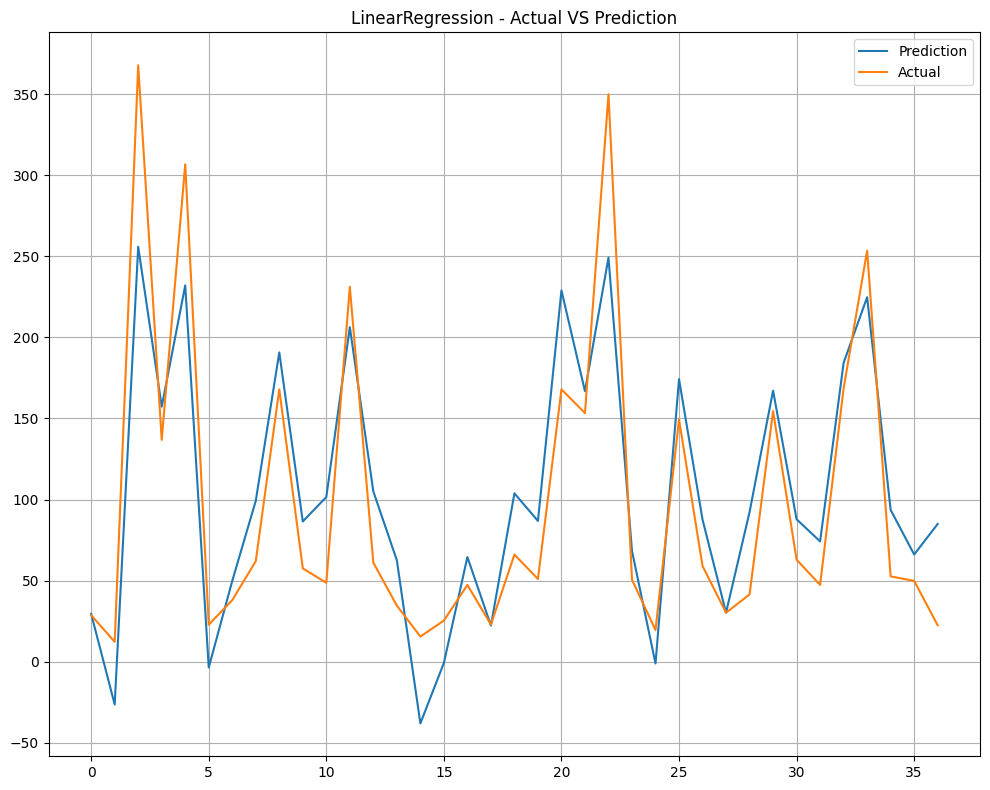

In [ ]:
# Visualizing Actual VS Prediction - LinearRegression
plot_actual_vs_pred(model=lr, model_name='LinearRegression')


----observation----
* some predicted values are going negative which should not be the case as price cannot be negative.
* At some points difference between actual and prediction is very high.

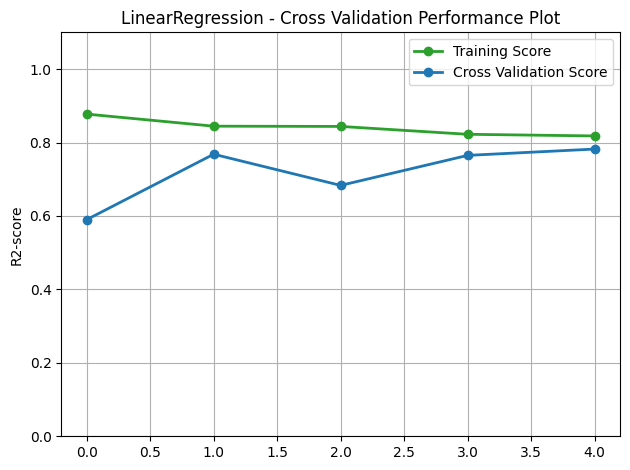


The CV test Score: [0.58993348 0.76809197 0.68316122 0.76490645 0.78212937]
Mean cross-validation score: 0.7176444981585364



In [ ]:
#  Linear Regression Cross Validation Performance Plot and cv r2-score
plot_cv_performance(model = lr, model_name = 'LinearRegression')

---observation----
* cross validation score is lower than training and testing scores.

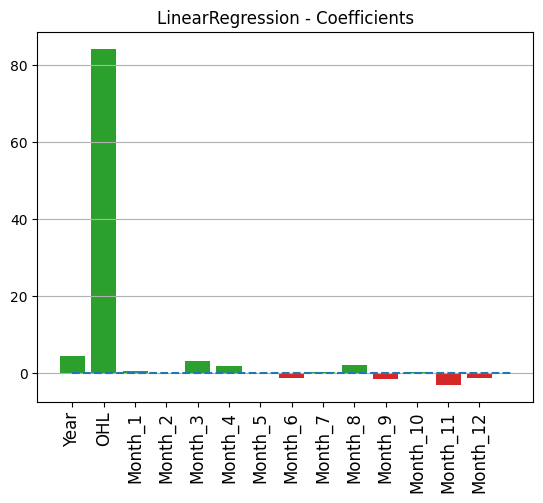

In [ ]:
# visualizing cofficients LinearRegression
plot_coef(model = lr, model_name = 'LinearRegression')

----observation----
* 'OHL' variable has highest coeficient value, it is contributing more to the model.
* other variables are not adding much value to the model.

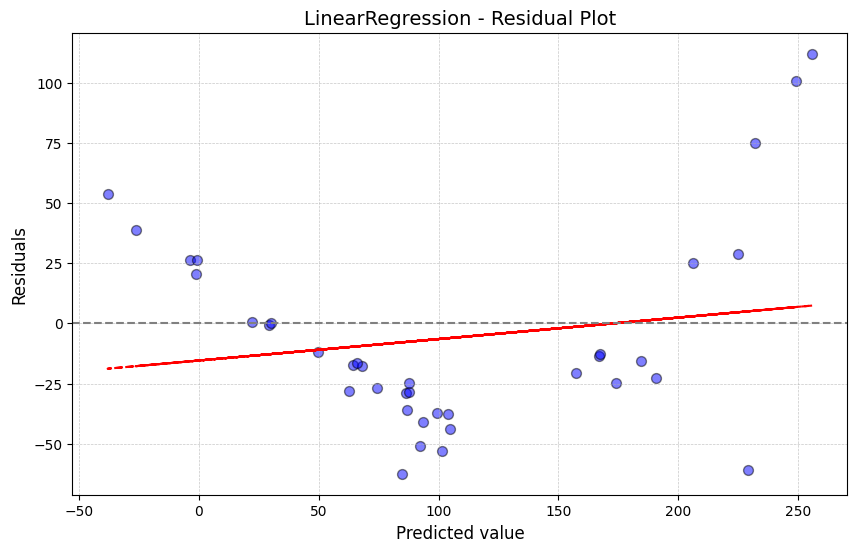

In [ ]:
# Check for homoscedasticity - LinearRegression
check_homoscedasticity(model = lr, model_name = 'LinearRegression')

----observation----
* we can observe something like U shaped pattern in residuals plot.
* From this we can say non-linear model will better fit here.


#### Ridge Implementation

In [ ]:
# Ridge Implementation
from sklearn.linear_model import Ridge
ridge = Ridge()

# Fit the Algorithm
ridge.fit(x_train, y_train)

print(f'Training Score : {ridge.score(x_train,y_train)}')
print(f'Testing Score : {ridge.score(x_test,y_test)}')

Training Score : 0.8159236415383254
Testing Score : 0.8082205937630329


----observation----
* Linear and Ridge scores for training and testing Scores are similar.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define Ridge regression
ridge = Ridge()

# Define hyperparameter grid
parameters = {'alpha': np.arange(0.1, 10, 0.1)}  # Adjust range as needed

# Perform GridSearchCV
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=tscv)

# Fit the algorithm
ridge_regressor.fit(x_train, y_train)

# Print best parameter
print("The best alpha value is found to be:", ridge_regressor.best_params_)

The best alpha value is found to be: {'alpha': 2.0}


In [ ]:
ridge = Ridge(2.0)

# Fit the Algorithm
ridge.fit(x_train, y_train)

print(f'Training Score : {ridge.score(x_train,y_train)}')
print(f'Testing Score : {ridge.score(x_test,y_test)}')

Training Score : 0.8157799135694022
Testing Score : 0.8064293947766381


-----observation----
* Testing Score is  not improved  implementing ridge with GridSearchCV parameter tunning

In [ ]:
# evaluation metrics - Ridge Model
update_e_metrics_df(model = ridge, model_name='Ridge')

,metrics,LinearRegression,Ridge
0,R2_score,0.810,0.806
1,adjusted_r2,0.689,0.683
2,MSE,1717.442,1749.652
3,RMSE,41.442,41.829
4,MAPE,0.666,0.662
5,MAE,33.545,33.594


----observation----
* No major changes in metrics chart here.

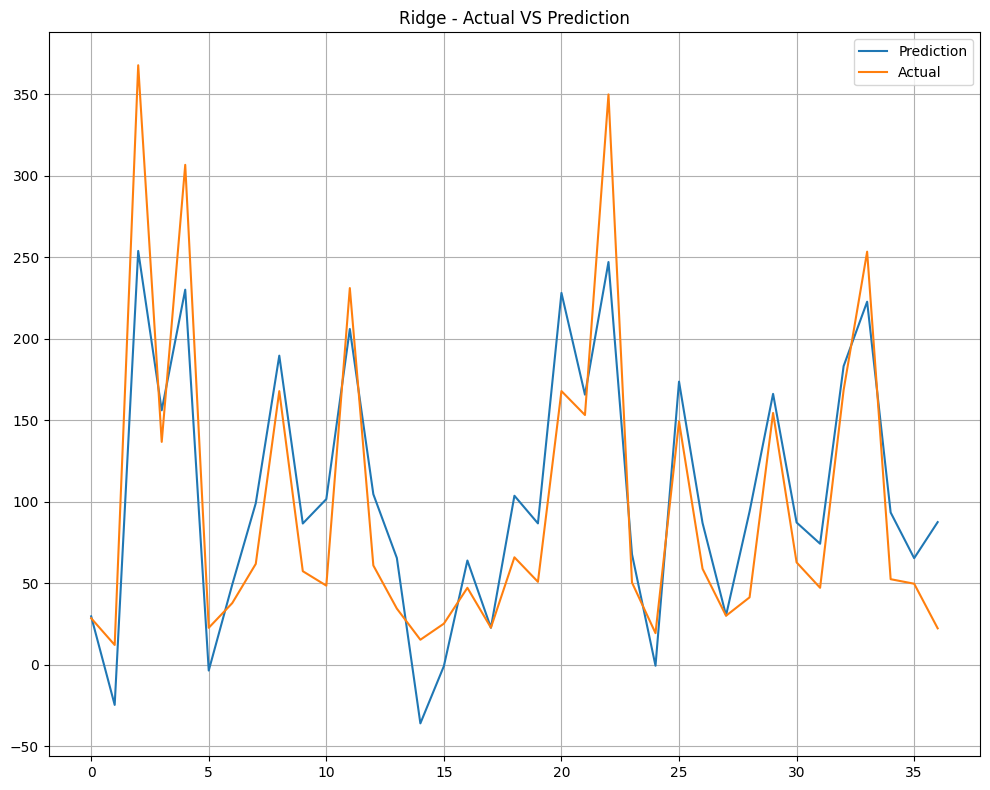

In [ ]:
# Visualizing Actual VS Prediction - Ridge
plot_actual_vs_pred(model = ridge, model_name='Ridge')

---observation----
* No major change can be observed here after implementing Ridge.

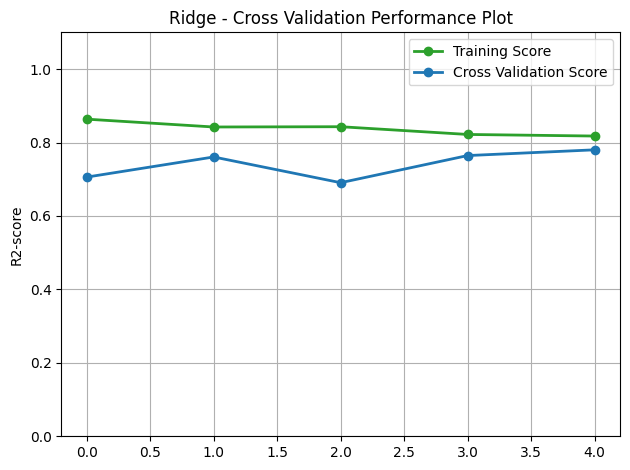


The CV test Score: [0.70576826 0.7606133  0.69055415 0.76442096 0.78006   ]
Mean cross-validation score: 0.740283333361515



In [ ]:
# Ridge - Cross Validation r2-score and Performance Plot
plot_cv_performance(model = ridge, model_name='Ridge')

----observation----
* Cross validation score increased by close to 1 percent.
* we can say Ridge is performing very slighlty better than base model.

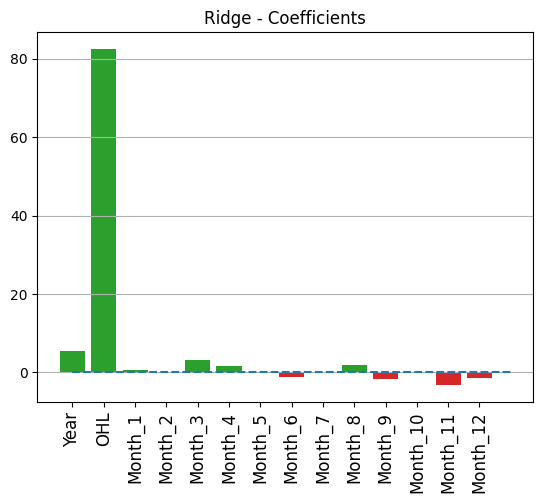

In [ ]:
# visualizing cofficients - Ridge
plot_coef(model = ridge, model_name='Ridge')

----observation----
* No change observed here

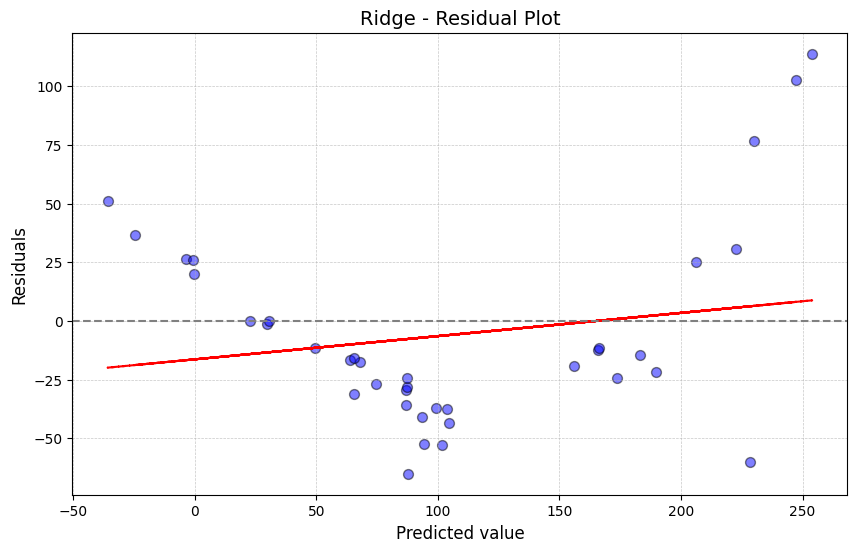

In [ ]:
# Check for homoscedasticity - Ridge
check_homoscedasticity(model = ridge, model_name='Ridge')

----observation----
* Again we can observe same some U shaped pattern in residuals plot.

### Lasso Implimentation

In [ ]:
# Lasso Implementation
from sklearn.linear_model import Lasso
lasso = Lasso()

# Fit the Algorithm
lasso.fit(x_train, y_train)

print(f'Training Score : {lasso.score(x_train,y_train)}')
print(f'Testing Score : {lasso.score(x_test,y_test)}')

Training Score : 0.8152066711307665
Testing Score : 0.8145293412548402


#### Cross- Validation & Hyperparameter Tuning

In [ ]:
# Lasso Implementation with GridSearch CV hyperparameter optimization technique
parameters = {'alpha': np.arange(0.1, 10, 0.1)}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=tscv)

# Fit the Algorithm
lasso_regressor.fit(x_train, y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 8.5}


In [ ]:
# Implementing lasso again with best alpha value which is found by the GridSearch CV
lasso = Lasso(8.5)

# Fit the Algorithm
lasso.fit(x_train, y_train)

print(f'Training Score : {lasso.score(x_train,y_train)}')
print(f'Testing Score : {lasso.score(x_test,y_test)}')

Training Score : 0.803992276660061
Testing Score : 0.8107361225407226


----observation----
* Testing Score improved even more after implementing Lasso with GridSearchCV parameter tunning.
* Lasso is definitly performing better than Ridge here.
* but also making model litle bit like under fit as testing score is more than training

In [ ]:
# evaluation metrics - Lasso Model
update_e_metrics_df(model = lasso, model_name='Lasso')

,metrics,LinearRegression,Ridge,Lasso
0,R2_score,0.810,0.806,0.811
1,adjusted_r2,0.689,0.683,0.691
2,MSE,1717.442,1749.652,1710.725
3,RMSE,41.442,41.829,41.361
4,MAPE,0.666,0.662,0.606
5,MAE,33.545,33.594,32.937


----observation----
* Metric chart has been improved aftere Lasso implementation.
* R2-score and Adjusted-R2 both increased around 7 and 10 percent respectively.
* Also MSE and MAE are decreased.

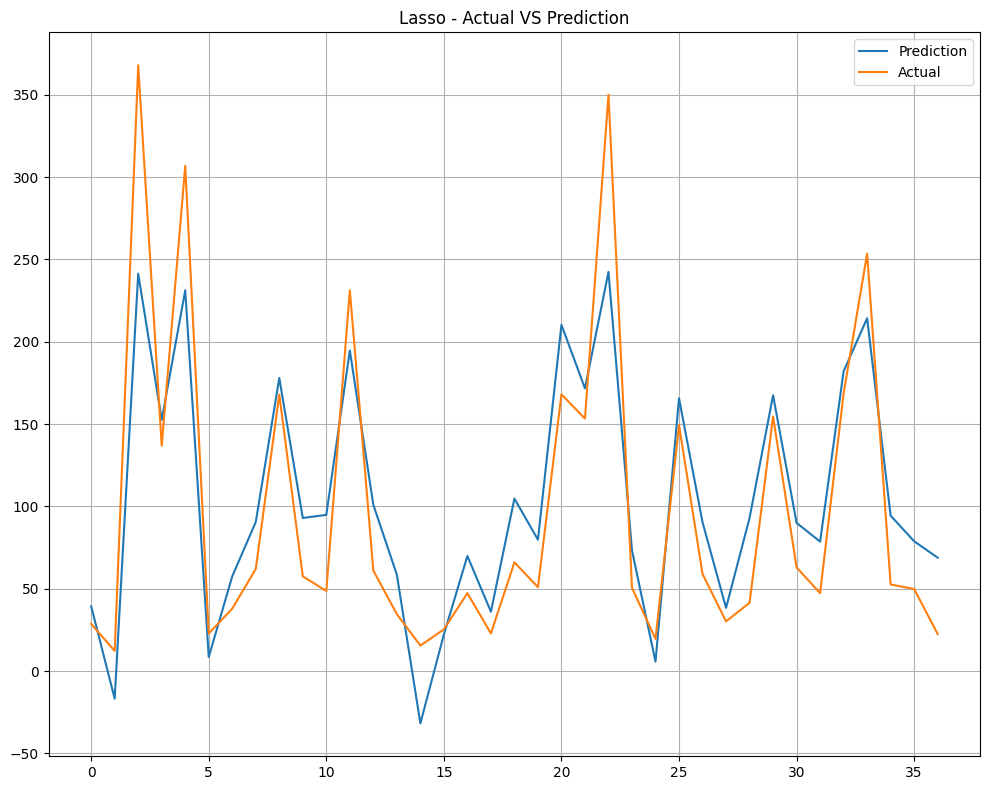

In [ ]:
# Visualizing Actual VS Prediction - Lasso
plot_actual_vs_pred(model = lasso, model_name='Lasso')

----observation----
* performing better than linear and ridge model.

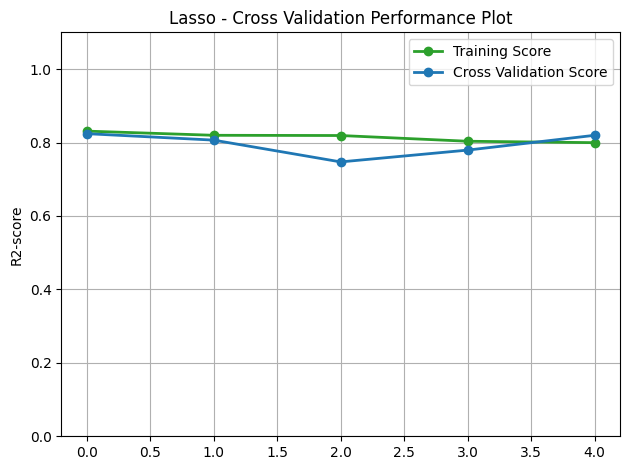


The CV test Score: [0.8240667  0.80649102 0.74714099 0.7792985  0.81959741]
Mean cross-validation score: 0.7953189228602926



In [ ]:
#  Lasso - Cross Validation r2-score and Performance Plot
plot_cv_performance(model = lasso, model_name='Lasso')

----observation----
* Lasso is performing much better in cross-validation than linear and ridge model.

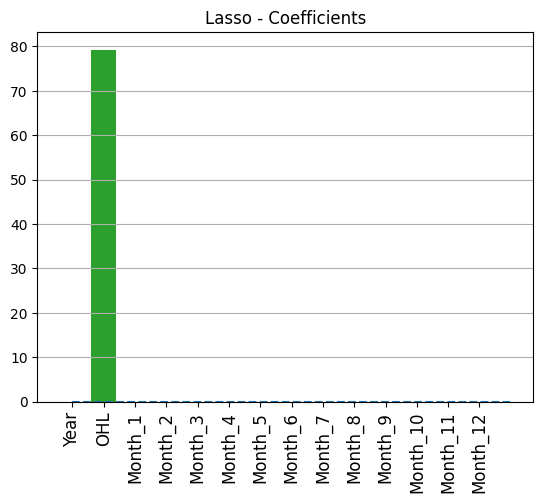

In [ ]:
# visualizing cofficients - Lasso
plot_coef(model = lasso, model_name='Lasso')

In [ ]:
# lasso coeficients
lasso.coef_

array([ 0.        , 79.25364992,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ])

----observation----
* All the variable's coeficients become 0 except OHL variable.

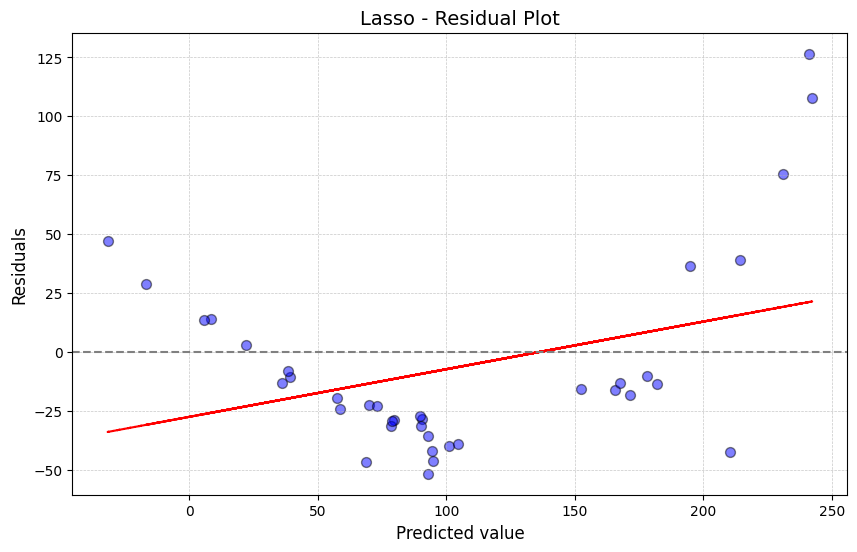

In [ ]:
# Check for homoscedasticity - Lasso
check_homoscedasticity(model = lasso, model_name='Lasso')

----observation----
* Not much change here in residual plot.
* we can observe same some like U shaped pattern in residuals plot again.

In [ ]:
# evaluation metrics chart
e_metrics_df

,metrics,LinearRegression,Ridge,Lasso
0,R2_score,0.810,0.806,0.811
1,adjusted_r2,0.689,0.683,0.691
2,MSE,1717.442,1749.652,1710.725
3,RMSE,41.442,41.829,41.361
4,MAPE,0.666,0.662,0.606
5,MAE,33.545,33.594,32.937


----observation----
* Metric chart has been improved aftere Lasso implementation.
* R2-score and Adjusted-R2 both increased around 7 and 10 percent respectively.
* Also MSE and MAE are decreased.

### ElasticNet Implementation

In [ ]:
# ElasticNet Implementation
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()

# Fit the Algorithm
elasticnet.fit(x_train, y_train)

print(f'Training Score : {elasticnet.score(x_train,y_train)}')
print(f'Testing Score : {elasticnet.score(x_test,y_test)}')

Training Score : 0.739343228482048
Testing Score : 0.6945754039311747


----observation----
* Testing Score is lesser than linear, ridge and lasso.
* no major difference in Training and Testing Scores which means No overfitting

#### Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import numpy as np

# ElasticNet Implementation
elasticnet = ElasticNet()

# Define the parameter grid for ElasticNet regression
parameters = {'alpha': np.arange(0.1, 10, 0.01)}  # Adjust range as needed

# Initialize GridSearchCV
elasticnet_regressor = GridSearchCV(elasticnet, parameters, scoring='r2', cv=tscv)

# Fit the algorithm
elasticnet_regressor.fit(x_train, y_train)

# Print the best alpha value
print("The best alpha value is found to be:", elasticnet_regressor.best_params_)

The best alpha value is found to be: {'alpha': 0.1}


In [ ]:
# ElasticNet Implementation again with best alpha value which is found by the GridSearch CV
elasticnet = ElasticNet(0.1)

# Fit the Algorithm
elasticnet.fit(x_train, y_train)

print(f'Training Score : {elasticnet.score(x_train,y_train)}')
print(f'Testing Score : {elasticnet.score(x_test,y_test)}')

Training Score : 0.8136743317464096
Testing Score : 0.7969232826910538


----observation----
* After hyper_parameter tunning Testing Score is improved but it is still lesser than lasso model.

In [ ]:
# evaluation metrics - ElasticNet Model
update_e_metrics_df(model = elasticnet, model_name='ElasticNet')

,metrics,LinearRegression,Ridge,Lasso,ElasticNet
0,R2_score,0.810,0.806,0.811,0.797
1,adjusted_r2,0.689,0.683,0.691,0.668
2,MSE,1717.442,1749.652,1710.725,1835.577
3,RMSE,41.442,41.829,41.361,42.844
4,MAPE,0.666,0.662,0.606,0.653
5,MAE,33.545,33.594,32.937,33.765


---observation----
* Elasticnet is performing worse than all of them.
* Lasso model is still the best model

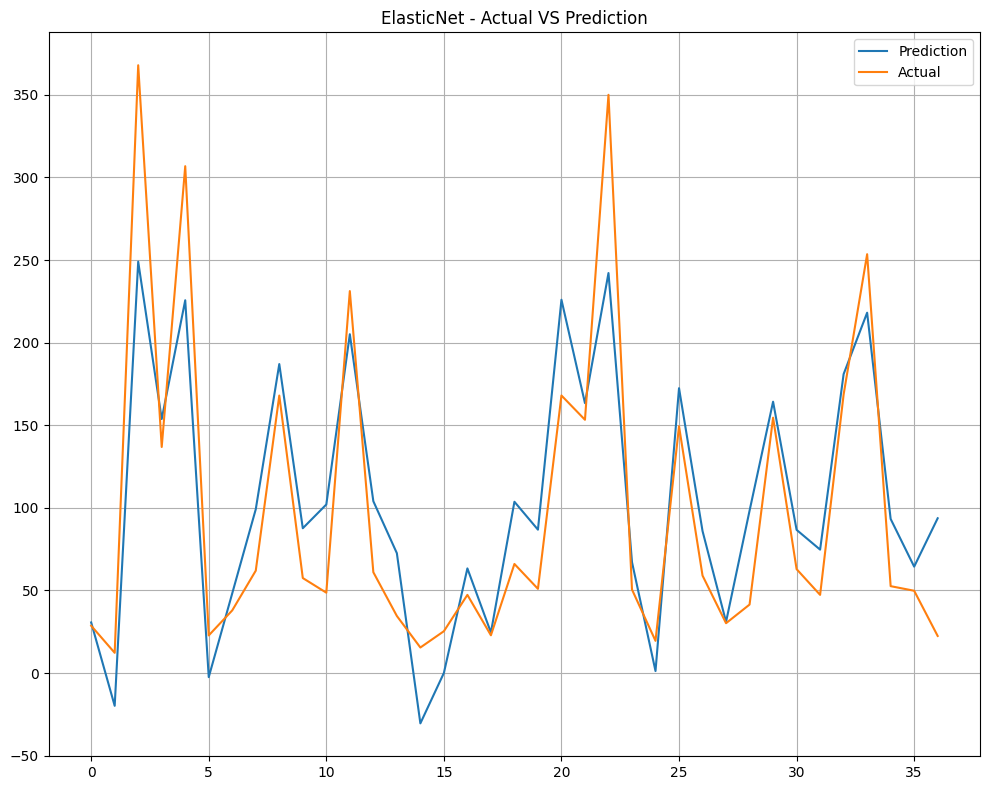

In [ ]:
# Visualizing Actual VS Prediction - ElasticNet
plot_actual_vs_pred(model = elasticnet, model_name='ElasticNet')

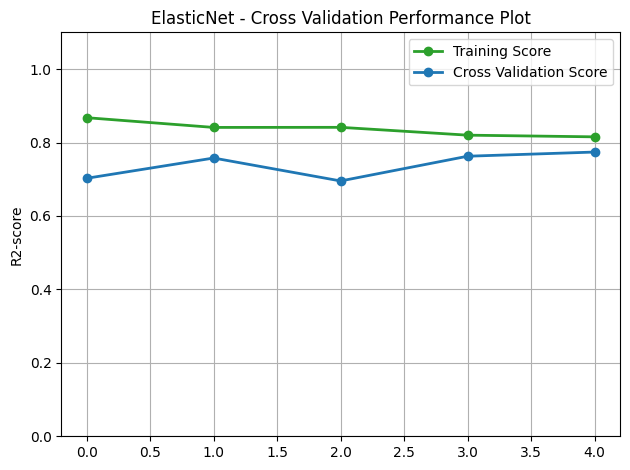


The CV test Score: [0.70256084 0.75771038 0.69528128 0.76262677 0.77400608]
Mean cross-validation score: 0.7384370697453055



In [ ]:
#  ElasticNet - Cross Validation r2-score and Performance Plot
plot_cv_performance(model = elasticnet, model_name='ElasticNet')

----observation----
* Ridge and ElasticNet both are almost same cross validation score.

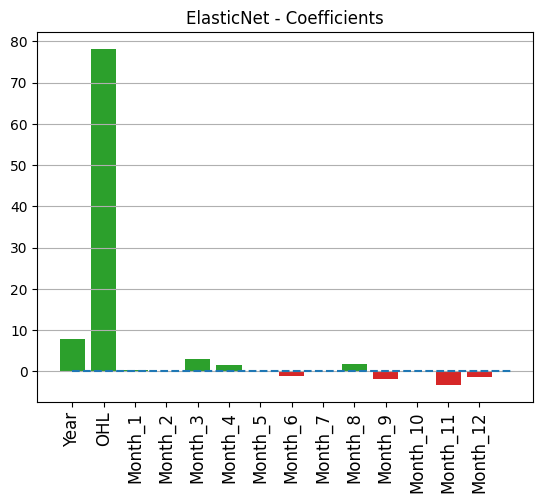

In [ ]:
# visualizing cofficients - ElasticNet
plot_coef(model = elasticnet, model_name='ElasticNet')

In [ ]:
# ElasticNet coeficients
elasticnet.coef_

array([ 7.88257613, 78.17692316,  0.44369412,  0.09176393,  3.07751926,
        1.58959811,  0.        , -1.16929836,  0.        ,  1.7767338 ,
       -1.73580775, -0.18296158, -3.2628495 , -1.32180739])

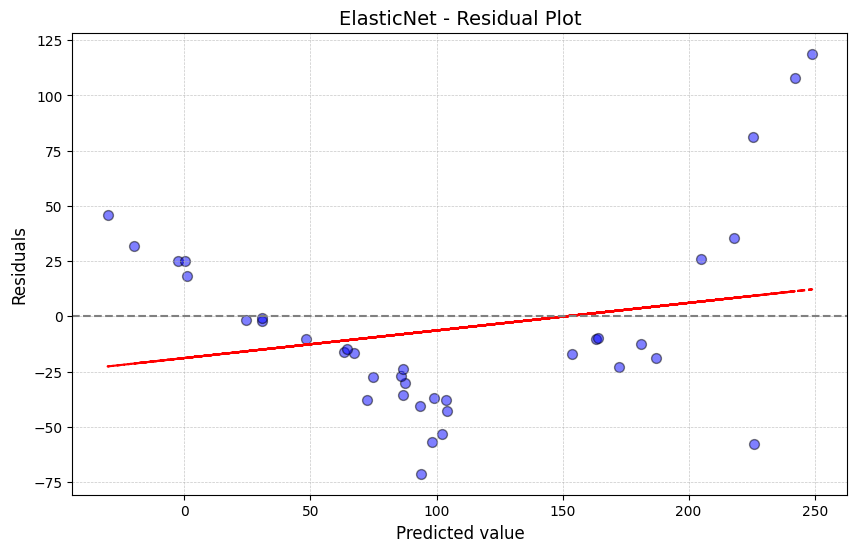

In [ ]:
# Check for homoscedasticity - ElasticNet
check_homoscedasticity(model = elasticnet, model_name='ElasticNet')

* Not much change here in residual plot.
* we can observe same some like U shaped pattern in residuals plot again.

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Lasso model is performing better than Linear, Ridge and ElasticNet models.

In [ ]:
# evaluation metrics chart
e_metrics_df

,metrics,LinearRegression,Ridge,Lasso,ElasticNet
0,R2_score,0.810,0.806,0.811,0.797
1,adjusted_r2,0.689,0.683,0.691,0.668
2,MSE,1717.442,1749.652,1710.725,1835.577
3,RMSE,41.442,41.829,41.361,42.844
4,MAPE,0.666,0.662,0.606,0.653
5,MAE,33.545,33.594,32.937,33.765


### Trying Polynomial Fit

* As in above residual plots, we have observed some kind of U shaped pattern, so polynomial fit could perform better here.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define the pipeline for polynomial regression
poly_pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lr", LinearRegression())
])

# Fit the pipeline
poly_pipe.fit(x_train, y_train)

# Print training and testing R2 scores
print("Training R2:", poly_pipe.score(x_train, y_train))
print("Testing R2:", poly_pipe.score(x_test,y_test))

Training R2: 0.9809207731312244
Testing R2: 0.9444464850610684


----observation----
* Training and Testing scores both increased very much.
* But the difference between training and testing scores can't be ignore, we can say this model is slighty overfitting.

In [ ]:
# evaluation metrics - Ployfit
update_e_metrics_df(model = poly_pipe, model_name='PolyFit')

,metrics,LinearRegression,Ridge,Lasso,ElasticNet,PolyFit
0,R2_score,0.810,0.806,0.811,0.797,0.944
1,adjusted_r2,0.689,0.683,0.691,0.668,0.908
2,MSE,1717.442,1749.652,1710.725,1835.577,502.139
3,RMSE,41.442,41.829,41.361,42.844,22.408
4,MAPE,0.666,0.662,0.606,0.653,0.200
5,MAE,33.545,33.594,32.937,33.765,13.877


----observation----
* metric scores are very good in PolyFit comapared to all other models.

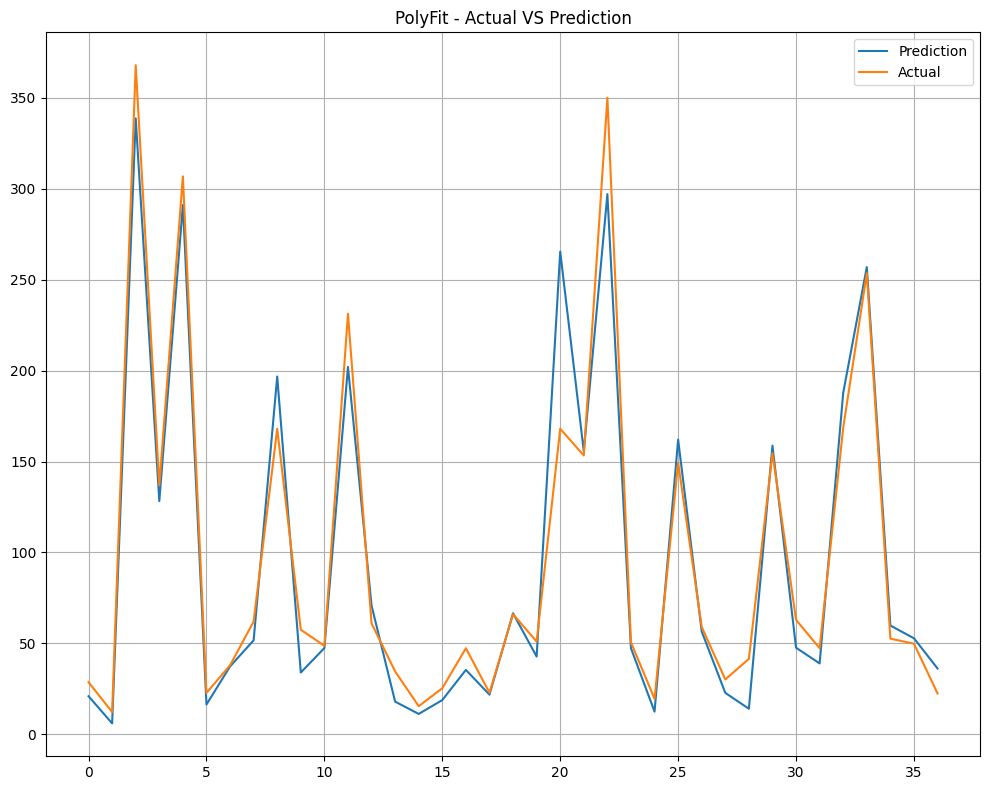

In [ ]:
# Visualizing Actual VS Prediction - Polyfit
plot_actual_vs_pred(model = poly_pipe, model_name='PolyFit')

----observation----
* Predictions are close to actual at most of the points.

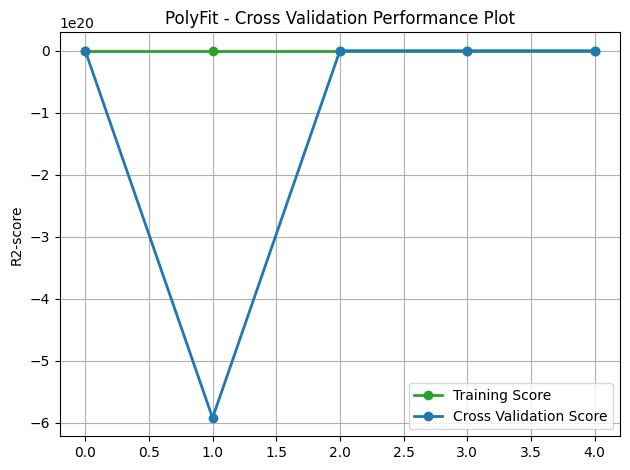


The CV test Score: [-6.92411045e-01 -5.91862814e+20  8.76205266e-01  9.61006201e-01
  9.34739413e-01]
Mean cross-validation score: -1.1837256283820874e+20



In [ ]:
#  PolyFit - Cross Validation r2-score and Performance Plot
plot_cv_performance(model = poly_pipe, model_name = 'PolyFit',y_lim=None)

----observation----
* PolyFit is doing very bad in Cross Validation performance plot showing overfitting at 1.

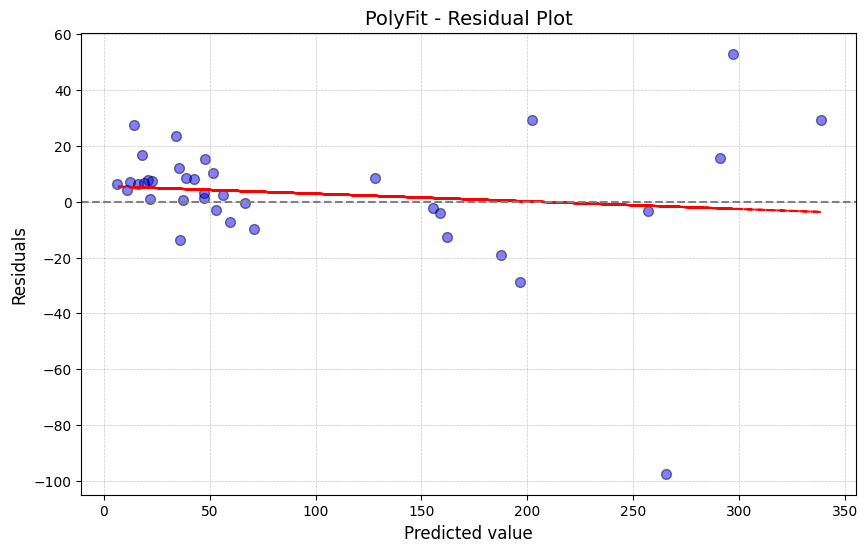

In [ ]:
# Check for homoscedasticity - PolyFit
check_homoscedasticity(model = poly_pipe, model_name='PolyFit')

----observation----
* Now we can observe change in residual plot after polyFit implementation.
* Most of the points are scattered randomly around the residual=0 line.

In [ ]:
# evaluation metrics chart
e_metrics_df

,metrics,LinearRegression,Ridge,Lasso,ElasticNet,PolyFit
0,R2_score,0.810,0.806,0.811,0.797,0.944
1,adjusted_r2,0.689,0.683,0.691,0.668,0.908
2,MSE,1717.442,1749.652,1710.725,1835.577,502.139
3,RMSE,41.442,41.829,41.361,42.844,22.408
4,MAPE,0.666,0.662,0.606,0.653,0.200
5,MAE,33.545,33.594,32.937,33.765,13.877


----observation----
* R2-score and adjustable-R2 has been increased in Polyfit model.
* MSE and MAE are very low in PolyFit comparison to other models.
* Also need to keep in mind cross validation scores were in negative for this PolyFit model.

### ML Model - 2
## Random Forest Regressor
####Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor Implementation
rf = RandomForestRegressor(random_state=42)

# Fit the Algorithm
rf.fit(x_train, y_train)

# Printing training and testing scores
print(f'Training Score : {rf.score(x_train,y_train)}')
print(f'Testing Score : {rf.score(x_test,y_test)}')


Training Score : 0.9970286448585457
Testing Score : 0.9693257918326152


----observation----
* Both training and testing score are very good.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
update_e_metrics_df(model = rf, model_name ='Randomforest')

,metrics,LinearRegression,Ridge,Lasso,ElasticNet,PolyFit,Randomforest
0,R2_score,0.810,0.806,0.811,0.797,0.944,0.969
1,adjusted_r2,0.689,0.683,0.691,0.668,0.908,0.949
2,MSE,1717.442,1749.652,1710.725,1835.577,502.139,277.259
3,RMSE,41.442,41.829,41.361,42.844,22.408,16.651
4,MAPE,0.666,0.662,0.606,0.653,0.200,0.127
5,MAE,33.545,33.594,32.937,33.765,13.877,9.318


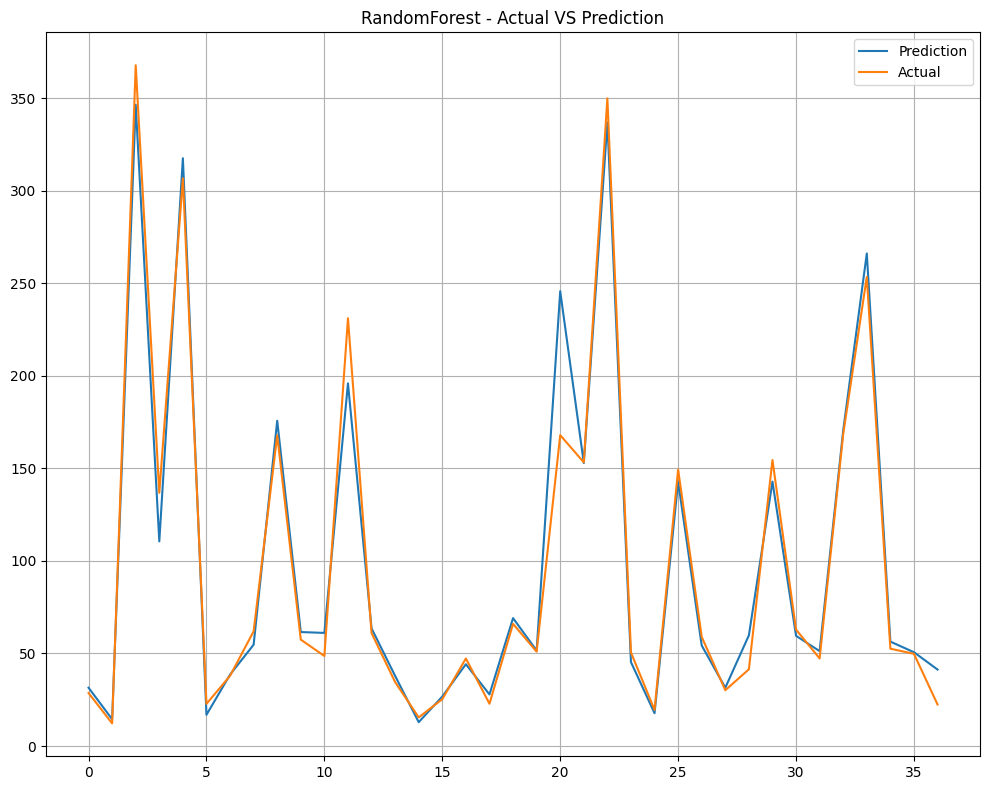

In [ ]:

# Visualizing Actual VS Prediction - RandomForestRegressor
plot_actual_vs_pred(model = rf, model_name ='RandomForest')

----observation----
* predicted values are very close to actual values.

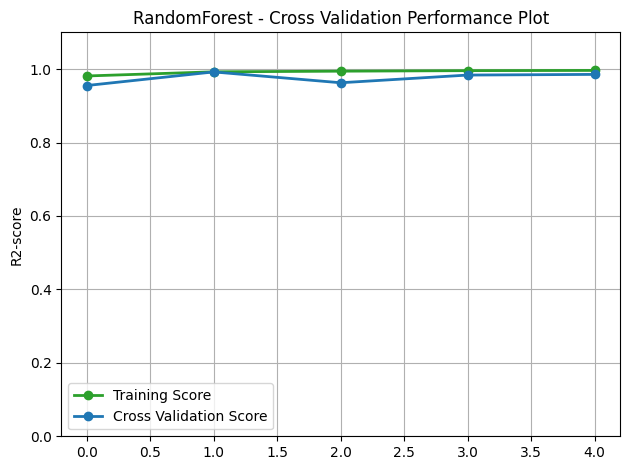


The CV test Score: [0.95512255 0.99218398 0.96269046 0.98363554 0.98544333]
Mean cross-validation score: 0.9758151689671546



In [ ]:
#  RandomForest - Cross Validation r2-score and Performance Plot
plot_cv_performance(model = rf, model_name ='RandomForest')

----observation----
* cross validation score is 0.97 which is pretty good

In [ ]:
pip install scikit-plot

<Axes: title={'center': 'Random Forest Regressor Feature Importance'}>

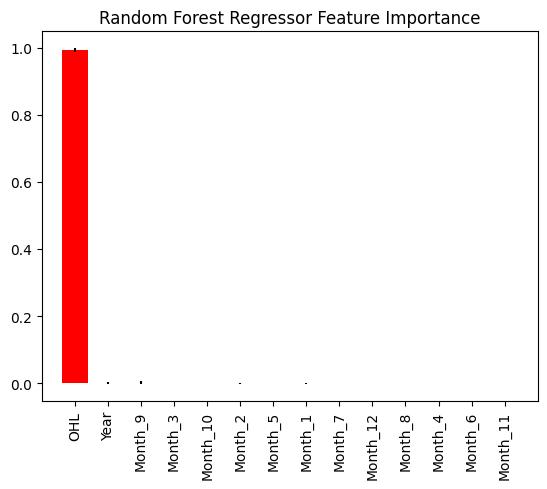

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import scikitplot as skplt

# Assuming x_train and y_train are already defined
# Assuming x_test and y_test are already defined
# Assuming rf is your trained RandomForestRegressor model

# Get feature names
features = selected_df.drop('Close', axis=1).columns

# Plot feature importances
skplt.estimators.plot_feature_importances(rf, feature_names=features,
                                          title="Random Forest Regressor Feature Importance",
                                          x_tick_rotation=90)


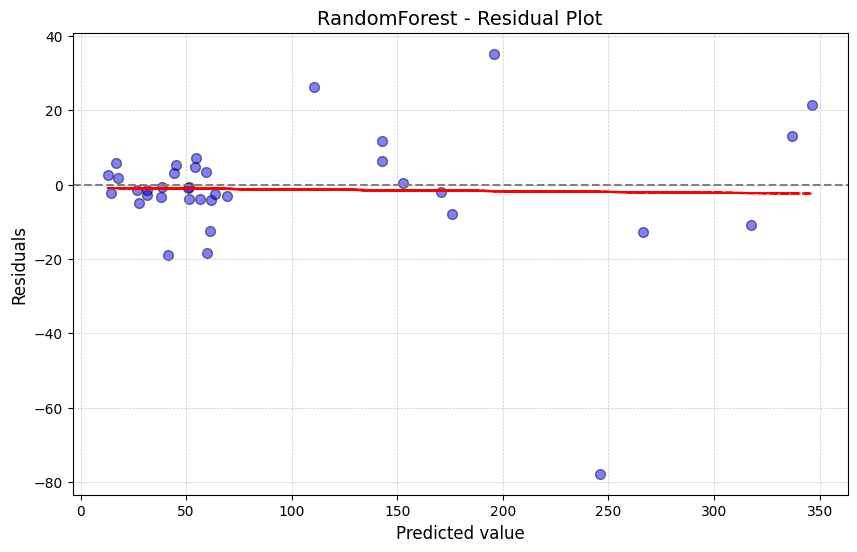

In [ ]:
# Check for homoscedasticity - RandomForest
check_homoscedasticity(model = rf, model_name ='RandomForest')

----observation----
* residuals is increasing with predicted values at some points.
* high error for larger predicted values at some points.

#### 2. Cross- Validation & Hyperparameter Tuning - Random Forest

In [ ]:
# RandomForestRegressor Implementation with GridSearchCV hyperparameter optimization technique
parameters = {'n_estimators': [100,105,110,115,120,130,150],
              'max_depth': [10,15,18,20,22,25,30,40,50],}
start = datetime.now()
grid_rf = GridSearchCV(RandomForestRegressor(), parameters, scoring='r2', cv=tscv)

# Fit the Algorithm
grid_rf.fit(x_train, y_train)
print(f"The best score : {grid_rf.best_score_} \n")
print(f"The best fit parameters are found out to be : {grid_rf.best_params_} \n")
end = datetime.now()
execution_time = round((end - start).seconds/60,2)
print(f'The computational time for finding the best parameters for random forest regressor model: {execution_time} minutes\n')

The best score : 0.9784316127561958 

The best fit parameters are found out to be : {'max_depth': 25, 'n_estimators': 105} 

The computational time for finding the best parameters for random forest regressor model: 1.12 minutes



##### Which hyperparameter optimization technique have you used and why?

* I have used GridSearchCV for Random forest regressor hyperparameter tunning because here we have small data size and also tunning 2 parameters only.

In [ ]:
# Implementing Optimal Randomforest Model with best parameters
optimal_rf = grid_rf.best_estimator_
# Fit the Algorithm
optimal_rf.fit(x_train, y_train)
print(f'Training Score : {optimal_rf.score(x_train,y_train)}')
print(f'Testing Score : {optimal_rf.score(x_test,y_test)}')

Training Score : 0.996181123541653
Testing Score : 0.9714028797580424


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, All metric scores has been improved slightly after random forest parameter tunning.
* R2-score and Ajdusted-r2 both increased a bit.
* MSE and MAE both decreased a little.

In [ ]:
# Metric Score chart
update_e_metrics_df(model = optimal_rf, model_name = 'Optimal_RandmForest')

,metrics,LinearRegression,Ridge,Lasso,ElasticNet,PolyFit,Randomforest,Optimal_RandmForest
0,R2_score,0.810,0.806,0.811,0.797,0.944,0.969,0.971
1,adjusted_r2,0.689,0.683,0.691,0.668,0.908,0.949,0.953
2,MSE,1717.442,1749.652,1710.725,1835.577,502.139,277.259,258.485
3,RMSE,41.442,41.829,41.361,42.844,22.408,16.651,16.077
4,MAPE,0.666,0.662,0.606,0.653,0.200,0.127,0.123
5,MAE,33.545,33.594,32.937,33.765,13.877,9.318,9.037


### ML Model - 3
## XGBRegressor

XGBoost (eXtreme Gradient Boosting) is a popular supervised-learning algorithm used for regression and classification on large datasets. It uses sequentially-built shallow decision trees to provide accurate results and a highly-scalable training method that avoids overfitting.

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBRegressor

# XGBRegressor Implementation
xgbr = XGBRegressor(verbosity=0)

# Fit the Algorithm
xgbr.fit(x_train, y_train)

print(f'Training Score: {xgbr.score(x_train, y_train)}')
print(f'Testing Score: {xgbr.score(x_test,y_test)}')

Training Score: 0.9999997290858942
Testing Score: 0.9694841170282423


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
update_e_metrics_df(model = xgbr, model_name='XGBoost')

,metrics,LinearRegression,Ridge,Lasso,ElasticNet,PolyFit,Randomforest,Optimal_RandmForest,XGBoost
0,R2_score,0.810,0.806,0.811,0.797,0.944,0.969,0.971,0.969
1,adjusted_r2,0.689,0.683,0.691,0.668,0.908,0.949,0.953,0.949
2,MSE,1717.442,1749.652,1710.725,1835.577,502.139,277.259,258.485,275.828
3,RMSE,41.442,41.829,41.361,42.844,22.408,16.651,16.077,16.608
4,MAPE,0.666,0.662,0.606,0.653,0.200,0.127,0.123,0.138
5,MAE,33.545,33.594,32.937,33.765,13.877,9.318,9.037,10.092


----observation----
* XGBoost is giving slightly better metric result than RandomForest.

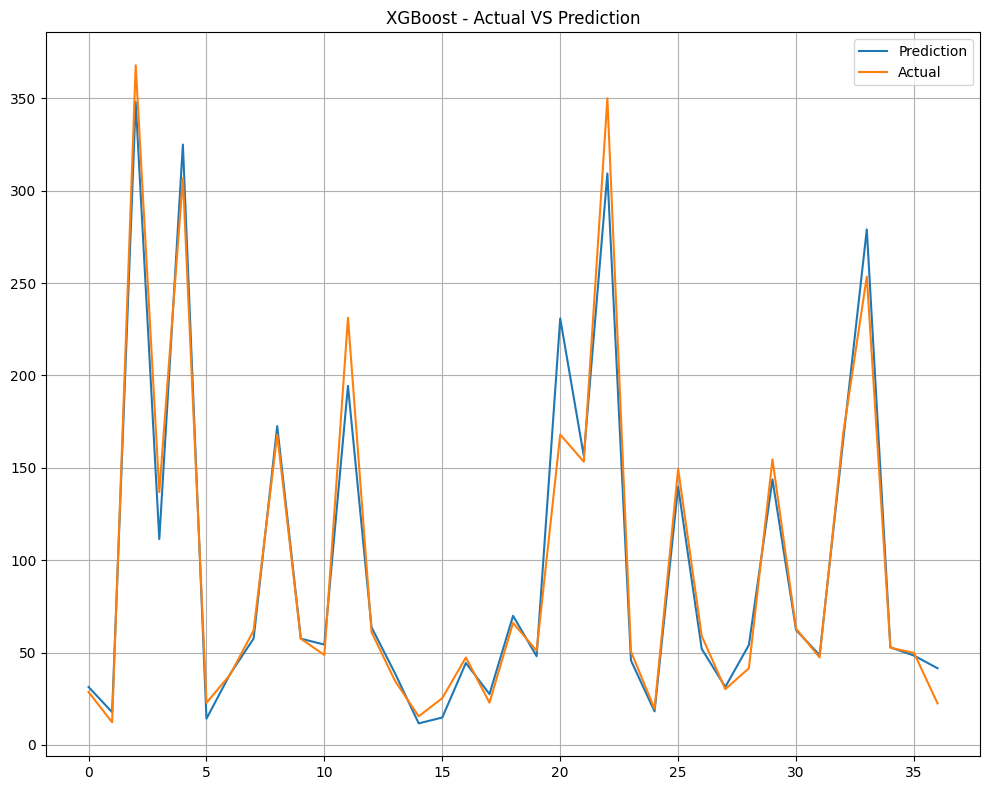

In [ ]:
# Visualizing Actual VS Prediction - XGBoost
plot_actual_vs_pred(model = xgbr, model_name='XGBoost')

#### 2. Cross- Validation & Hyperparameter Tuning

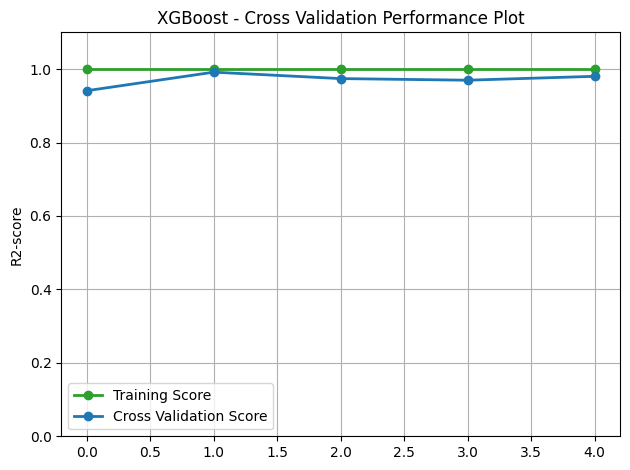


The CV test Score: [0.94098053 0.99153763 0.97404437 0.9696447  0.9802276 ]
Mean cross-validation score: 0.9712869659366026



In [ ]:
#  XGBoost - Cross Validation r2-score and Performance Plot
plot_cv_performance(model = xgbr, model_name='XGBoost')

<Axes: title={'center': 'XGBoost Regressor Feature Importance'}>

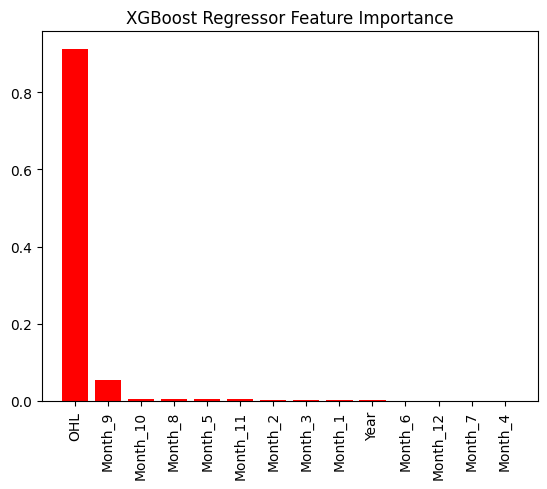

In [ ]:
# XGBoost Regressor Feature Importance
features = selected_df.drop('Close', axis = 1).columns
skplt.estimators.plot_feature_importances(xgbr, feature_names=features,
                                         title="XGBoost Regressor Feature Importance",
                                         x_tick_rotation=90,)

----observation----
* Most important feature is OHL which is same for every model as we seen in correlation heatmap also OHL has very strong correlation of 0.99 with dependent variable.

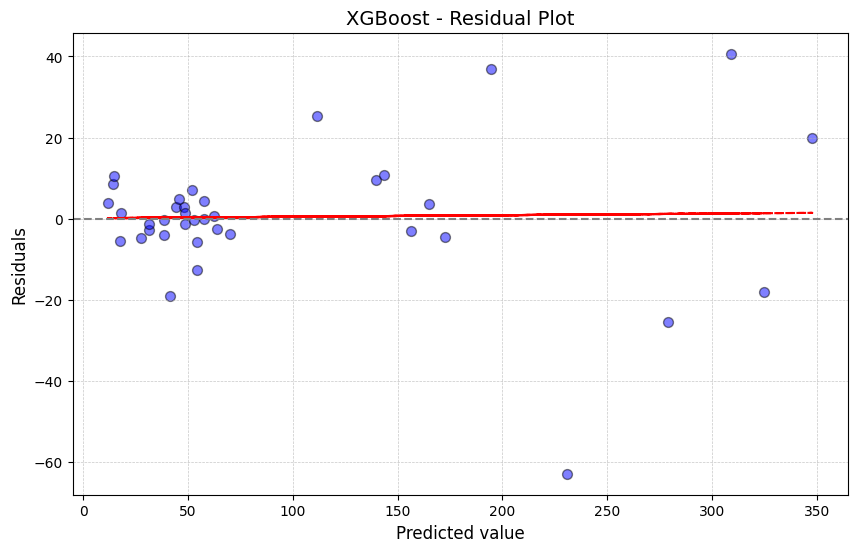

In [ ]:
# Check for homoscedasticity - XGBoost
check_homoscedasticity(model = xgbr, model_name='XGBoost')

--observation----
* No specific Pattern is visible although but we can observe that for high predicted value high residual can be seen on some points.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime
from xgboost import XGBRegressor

# Define hyperparameters grid
parameters = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 18, 20, 22],
    'learning_rate': [0.1, 0.2, 1],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize RandomizedSearchCV
optimal_xgbr = RandomizedSearchCV(XGBRegressor(verbosity=0), parameters, scoring='r2', cv=tscv, n_iter=300, random_state=42)

# Fit the algorithm
start_time = datetime.now()
optimal_xgbr.fit(x_train, y_train)
end_time = datetime.now()

# Print the best score and best parameters
print(f"The best score: {optimal_xgbr.best_score_}")
print(f"The best parameters: {optimal_xgbr.best_params_}")

# Calculate and print the execution time
execution_time = (end_time - start_time).seconds / 60
print(f'The computational time for finding the best parameters for XGBoost regressor model: {execution_time} minutes')

The best score: 0.9750931875522963
The best parameters: {'subsample': 0.9, 'reg_lambda': 1.2, 'reg_alpha': 1.3, 'n_estimators': 500, 'max_depth': 20, 'learning_rate': 1, 'colsample_bytree': 0.8}
The computational time for finding the best parameters for XGBoost regressor model: 3.45 minutes


##### Which hyperparameter optimization technique have you used and why?

In [ ]:
# Implementing Optimal XGBoost Model with best parameters
optimal_xgboost = optimal_xgbr.best_estimator_
# Fit the Algorithm
optimal_xgboost.fit(x_train, y_train)
print(f'Training Score : {optimal_xgboost.score(x_train,y_train)}')
print(f'Testing Score : {optimal_xgboost.score(x_test,y_test)}')

Training Score : 0.9999975544049041
Testing Score : 0.9410601058196058


* I have used RandomizedSearchCV for XGBRegressor hyperparameter tunning because here we are tunning many parameters at once and GridSearchCv will take too much time.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Evaluation metric Score Chart
update_e_metrics_df(model = optimal_xgboost, model_name = 'Optimal_XGBoost')

,metrics,LinearRegression,Ridge,Lasso,ElasticNet,PolyFit,Randomforest,Optimal_RandmForest,XGBoost,Optimal_XGBoost
0,R2_score,0.810,0.806,0.811,0.797,0.944,0.969,0.971,0.969,0.967
1,adjusted_r2,0.689,0.683,0.691,0.668,0.908,0.949,0.953,0.949,0.946
2,MSE,1717.442,1749.652,1710.725,1835.577,502.139,277.259,258.485,275.828,301.521
3,RMSE,41.442,41.829,41.361,42.844,22.408,16.651,16.077,16.608,17.364
4,MAPE,0.666,0.662,0.606,0.653,0.200,0.127,0.123,0.138,0.140
5,MAE,33.545,33.594,32.937,33.765,13.877,9.318,9.037,10.092,10.362


----observation----
* MSE is increased a little and
* MAE is slightly decreased after XGboost parameter tunning.

Answer Here.

### 1. Which ML model did you choose from the above created models as your final prediction model and why?

**Optimal Random Forest** because it is performing better than other models at every aspects.
* It has highest r2 and adjusted-r2 score.
* It has lowest RMSE and MAE score which means lowest error.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Let's see what we did and what we got in this project in a nutshell.

#What We Did :-
The objective of this project was to predict the stock's closing price of the month and to achieve the objective,
* we started with importing required libraries and load the dataset.
* than performed EDA(exploartory data analysis)
* analyze outliers
* did some data manipulation
* hypothesis testing
* feature engineering and data preprocessing
* Ml model implementation and record the evaluation metric scores
* and in the end explain the model using SHAP model explainability tool.

ML models we used:
* Linear regression
* Ridge, Lasso and ElasticNet for Regularization
* Random Forest Regressor
* XGboost Regressor


##What We Got :-

###important Instances & Observations we discovered after analyzing the yes bank's stock price datasets
* Given dataset has neither missing values and nor outliers.

* In year of 2017 and 2018 stock prices were at their peak.
* All time high was 404, it was in 2018.
* All time low was 5.55, it was in 2020.
* From 2016 to 2018, price is increased at high rate.
* After 2018 price is decreased at very high rate.
* In 2019 and 2020 also, price is continuously decreasing.
* All open, high, low and close price has positively skewed distribution.
* All open, high, low and close has strong correlation with eachother.
* All Open , high and low has strong linear relationship with dependent variable.


###Observations while model implementation

* Our first and base model was Linearregression, and got a decent training and testing score of 0.82 and 0.76 respectively with high MSE and MAE metric score.

* Than we implemented Ridge, lasso and ElasticNet regulization models and Lasso model found out as a better model with 0.83 r2-score and MSE and MAE was also very low as compared to base model.

* than we tried Polyfit model which was giving a pretty good result but was performing very bad in cross-validation.

* Than we implemented Random Forest Regressor and XGboost Regressor, both of them were performing far better than other previous models at every metric..

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***